## About The Superstore 
E-commerce platform allows people to buy products from books, toys, clothes, and shoes to food, furniture, and other household items.



## About The dataset  
Let us understand the attributes of this data set:

'Row ID' - This is nothing but Serial No.   
'Order ID' - ID created when a product order is placed.  
'Order Date' - Date on which a customer places his/her order.  
'Ship Date' - Date on which the order is shipped.  
'Ship Mode' - Mode of shipment of each order.  
'Customer ID' - ID assigned to each customer who places an order.  
'Customer Name' - Name of Customer.  
'Segment' - Section from where the order is placed.  
'Country' - Country details of this data set. We are looking only for US store data.  
'City' - Cities of US are listed here.  
'State' - States of US are listed here.  
'Postal Code' - pin code   
'Region' - grouped into region wise  
'Product ID' - Product ID of each product  
'Category' - Category to which each product belongs to.  
'Sub-Category' - Sub-Category of each Category  
'Product Name' - Name of products.  
'Sales' - Selling Price of each product.  
'Quantity' - number of quantity available for a particular product.  
'Discount' - Discount available on each product.  
'Profit' - Profit gained on each product.  


## The Aim Of The Project   
The Aim of this Project is analysing the sales data and identifying weak areas and opportunities for SuperStore to boost business growth  
The Project has been divided into several sections , with each having it's own analytics , conclusions and recommendations.

First, Importing the required required libraries and reading the dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
import datetime 
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_excel('/Users/immortal/Desktop/DataScience/Milestone1/US Superstore data.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


The length of the data and its info , and also the Statics Summary

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [37]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [38]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Exploratory Data Analysis

HeatMap Graph Shows the Correlation between the numerical Columns

<AxesSubplot:>

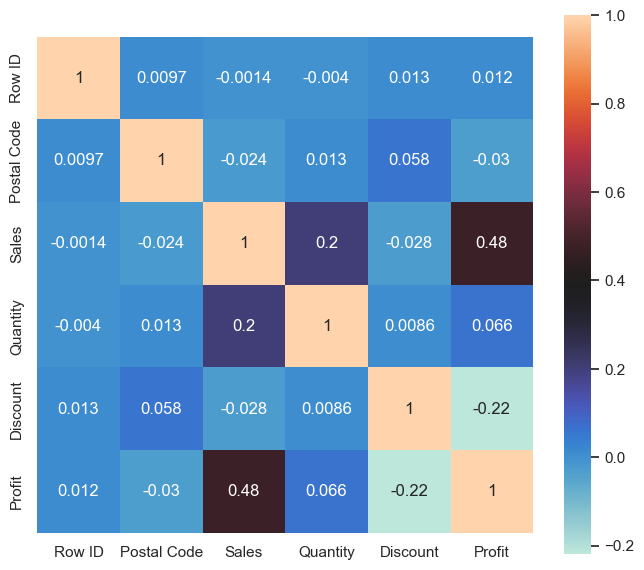

In [93]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),vmax=1, square=True,annot=True, cmap='icefire')

## Data Cleaning
1- Checking for missing values  
2- Checking for Dublicates rows  
3- Drop Unnecessary columns  

Checking for Missing values

In [57]:
df.isna().sum() #unfortunately the data has not missing values :( 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Checking for Duplicated Rows

In [5]:
df.duplicated().sum() 

0

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Drop Unnecessary Columns

In [5]:
df.drop(['Row ID','Order ID' ,'Customer ID','Postal Code' , 'Product ID' ], axis=1 , inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

We will Drop Country Column because the analysis is on United States only 

In [6]:
df.drop(['Country'], axis=1 , inplace=True)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df_negative_prof=df[df['Profit']<0] # records that have negative Profit ---> Saved it in new DataFrame for Later !
df_negative_prof.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,2017-07-16,2017-07-18,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522


In [10]:
df_positive_prof=df[df['Profit']>0] #records that have positive Profit
df_positive_prof.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694


Here We Make a new column to know how is the profit comes from and its contains a formula that calculate it and we call the column Sell_price

In [7]:
df['Sell_Price']=df.apply(lambda x : ((x['Sales']*x['Quantity'])-(x['Sales']*x['Quantity'])*x['Discount'])-x['Profit'] , axis=1)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400


# Data Visualization

what is the best Categories US superstore sales ?

<AxesSubplot:xlabel='Category', ylabel='Sales'>

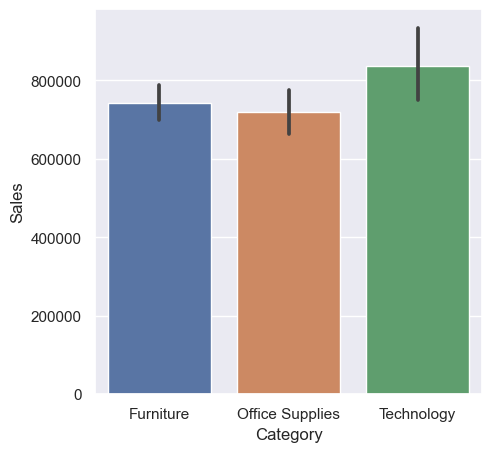

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Category' , y='Sales' , estimator= sum , data=df) # The best categories he sales

what is the best Categories US superstore makes more profits ?

<AxesSubplot:xlabel='Category', ylabel='Profit'>

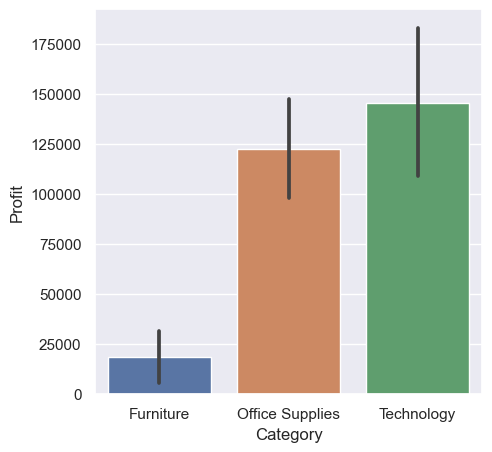

In [15]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Category' , y='Profit' , estimator= sum , data=df)  # Here he make more sales in furniture but he didn't make any profit on it ..

 Which category has more ordered by Quantity ?

<AxesSubplot:xlabel='Category', ylabel='Quantity'>

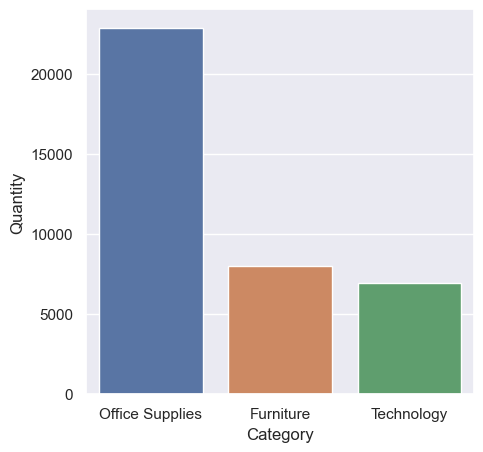

In [16]:
sns.set(rc={'figure.figsize':(5,5)})
df_quantity=pd.DataFrame(df.groupby(['Category'])['Quantity'].sum().sort_values(ascending=False))
sns.barplot(data=df_quantity , x=df_quantity.index , y=df_quantity.Quantity )

How much he make from furniture over years ?

In [17]:
df[df['Category']=='Furniture']['Profit'].sum() # he make 18451 $ profit only in furniture for all years.

18451.272799999984

Here we will Make a new column name Year

In [8]:
#Make new column year
df['year']=df['Order Date'].dt.year
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015


Which year he make more profit and Sales ?

In [19]:
df.groupby(['year'])['Profit'].sum().sort_values(ascending=False) # 2017 is the best year !

year
2017    93439.2696
2016    81795.1743
2015    61618.6037
2014    49543.9741
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Profit'>

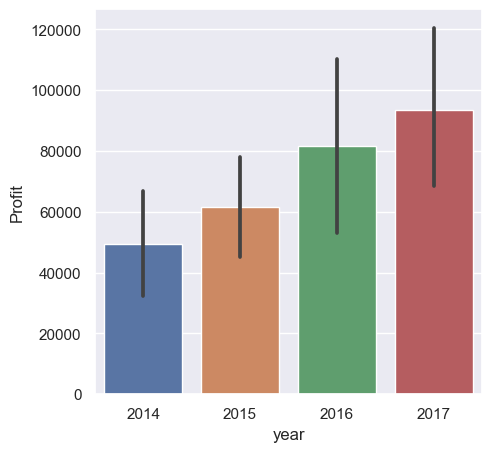

In [20]:
sns.barplot(x='year' , y='Profit' , data=df , estimator=sum) # He increase in profit every year 

Graph Shows The Sales every year

<AxesSubplot:xlabel='year', ylabel='Sales'>

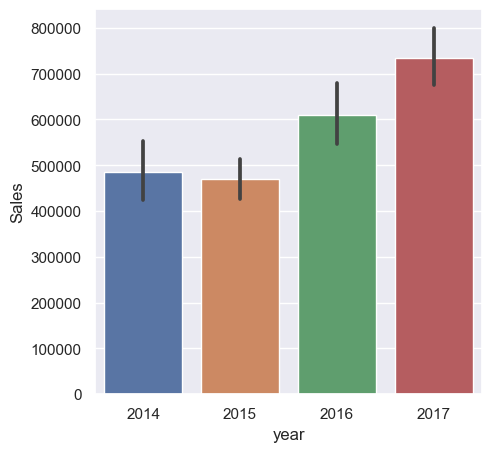

In [117]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='year' , y='Sales' , data=df , estimator=sum)

<AxesSubplot:xlabel='year', ylabel='Sales'>

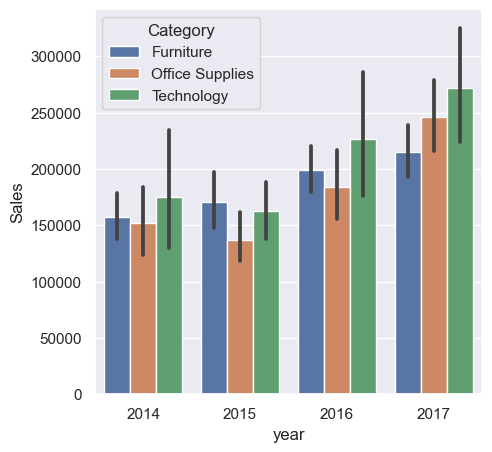

In [119]:
# He made less Sales in 2015 becaues of office supplies Sales which is the best sales in all years
sns.barplot(x='year' , y='Sales' , data=df , estimator=sum , hue='Category')

We notice from the grapgh that he increase every year by around 14631.76 Profit Plus every year 

In [31]:
print(93439.2696-81795.1743) # 2017-2016
print(81795.1743-61618.6037) #2016-2015
print(61618.6037-49543.9741) # 2015-2014

11644.0953
20176.5706
12074.6296


In [32]:
sum([11644.0953 ,20176.5706 ,12074.6296 ])/3 # He Make 14631.76 Profit Plus every year 

14631.765166666666

Which year has more profit at which category ?

<AxesSubplot:xlabel='year', ylabel='Profit'>

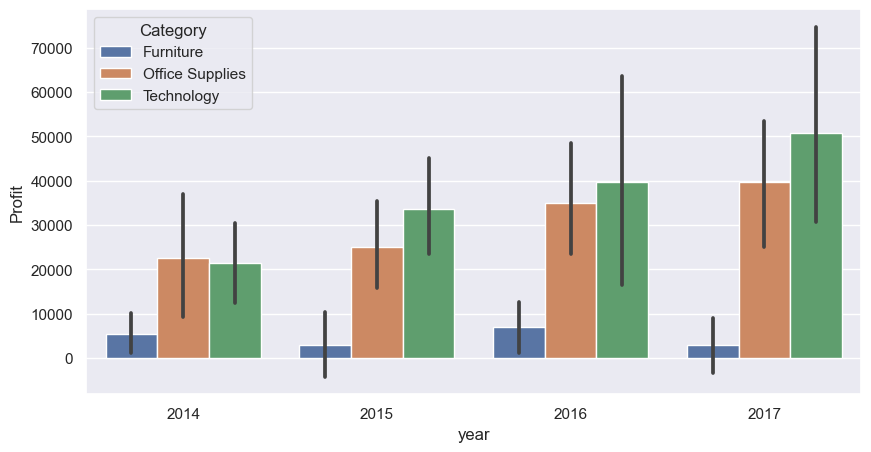

In [21]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='year' , y='Profit' , data=df , estimator=sum , hue='Category') 

Why he has less proft in furniture at year 2015 and 2017 ?

In [22]:
#Display the 2017 and 2015 years
df[(df['year']==2017) | (df['year']==2015)]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015
12,2017-04-15,2017-04-20,Standard Class,Andrew Allen,Consumer,Concord,North Carolina,South,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,31.881600,2017
14,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,192.668000,2015
15,2015-11-22,2015-11-26,Standard Class,Harold Pawlan,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,5.342400,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,2017-11-17,2017-11-21,Standard Class,Ruben Ausman,Corporate,Athens,Georgia,South,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470,974.853000,2017
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,168.286800,2017
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,394.328400,2017
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,105.080000,2017


Make a new column called time_shipping_spent to know how many days it takes for shipping

In [9]:
df['time_shipping_spent']=df['Ship Date']-df['Order Date'] # ---- > For later
df.head() 

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3 days
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3 days
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4 days
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7 days
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7 days


In [24]:
# Display year 2015 and 2017 for firnuture..
df[((df['year']==2017) | (df['year']==2015)) & (df['Category']=='Furniture')]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7 days
23,2017-07-16,2017-07-18,Second Class,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,100.940400,2017,2 days
24,2015-09-25,2015-09-30,Standard Class,Emily Burns,Consumer,Orem,Utah,West,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,2893.625100,2015,5 days
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,12457.057200,2015,4 days
29,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250,282.555000,2015,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,2017-06-01,2017-06-03,Second Class,Helen Wasserman,Corporate,Indianapolis,Indiana,Central,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464,11016.033600,2017,2 days
9955,2015-12-14,2015-12-16,Second Class,Darren Budd,Corporate,Los Angeles,California,West,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",273.5680,2,0.20,10.2588,427.450000,2015,2 days
9962,2015-03-19,2015-03-22,First Class,Corinna Mitchell,Home Office,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704,1110.696832,2015,3 days
9980,2015-09-06,2015-09-09,Second Class,Shaun Weien,Consumer,Lafayette,Louisiana,South,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548,63.625200,2015,3 days


which categories he lose on 2015 and 2017 in furniture and how much ?  
we notice that he lose in tables and bockcases

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

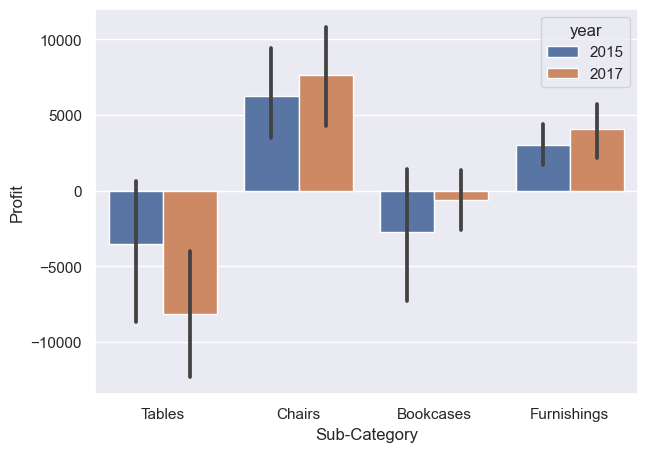

In [29]:
#which categories he lose on it ?
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Sub-Category' , y='Profit' , estimator=sum , data=df[((df['year']==2017) | (df['year']==2015)) & (df['Category']=='Furniture')] , hue='year')

How much he loss on tables and bookcases in 2015 and 2017 ?

In [127]:
df[((df['year']==2017) | (df['year']==2015)) & ((df['Sub-Category']=='Tables') | (df['Sub-Category']=='Bookcases'))]['Profit'].sum()

-14989.352900000005

How much he make overall in 2017 and 2015 in Furniture ?

In [131]:
df[((df['year']==2017) | (df['year']==2015)) & (df['Category']=='Furniture')]['Profit'].sum()

6033.59419999999

The Best Sub-Categories he sales Visualization

<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

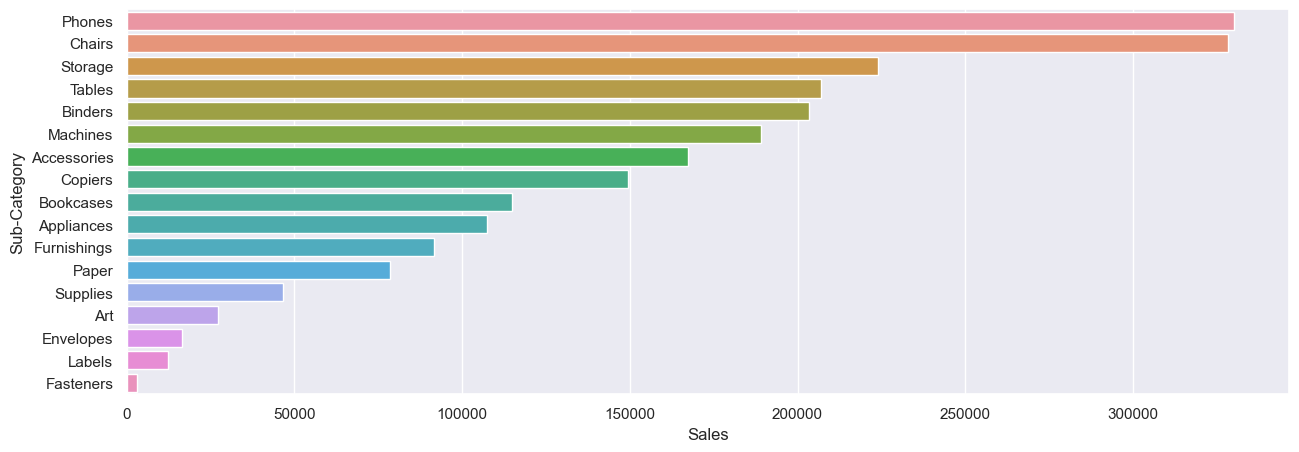

In [35]:
sns.set(rc={'figure.figsize':(15,5)})
df_category_sal=pd.DataFrame(df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False)) 
sns.barplot(x='Sales' , y=df_category_sal.index , data=df_category_sal)

The Best Sub-Categories Profites

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

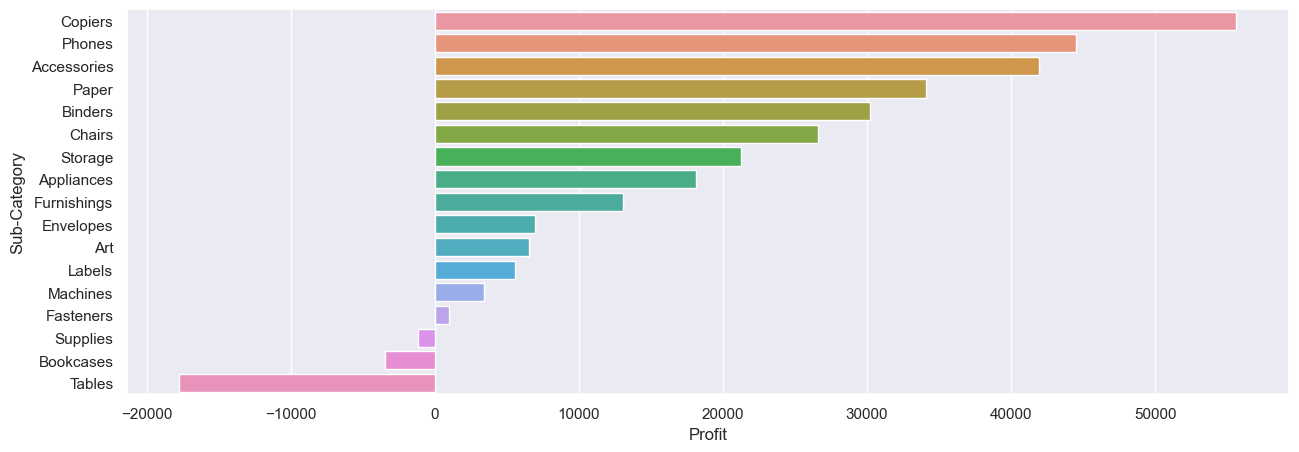

In [36]:
df_category_Profit=pd.DataFrame(df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)) 
sns.barplot(x='Profit' , y=df_category_Profit.index , data=df_category_Profit)

In [10]:
# Convert time_shipping_spent from datetime to integer .
df["time_shipping_spent"] = (df["time_shipping_spent"]).dt.days
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,56.492400,2014,2
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,168.286800,2017,5
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,394.328400,2017,5
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,105.080000,2017,5


In [38]:
df[df['Category']=='Technology']['Profit'].sum() # He Makes 145454.9 $ profit for technology in all years

145454.94809999998

When we SubCategory the technology category we find that he make negative profit in machines while aslo he make more sales on it

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

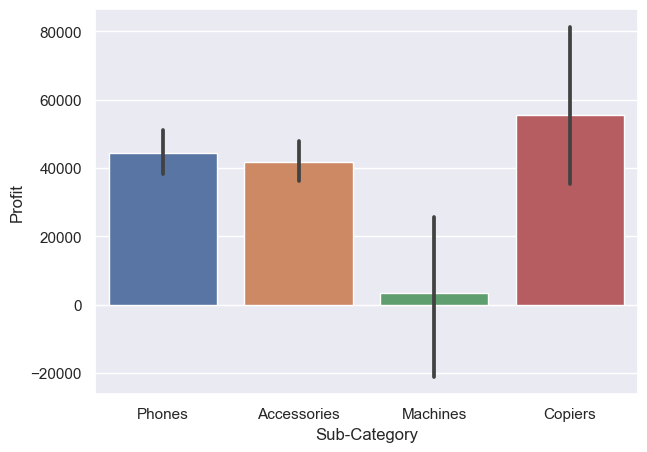

In [41]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Sub-Category' , y='Profit' , data=df[df['Category']=='Technology'] , estimator=sum) 

 Graph shows the Technology sub-category sales 

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

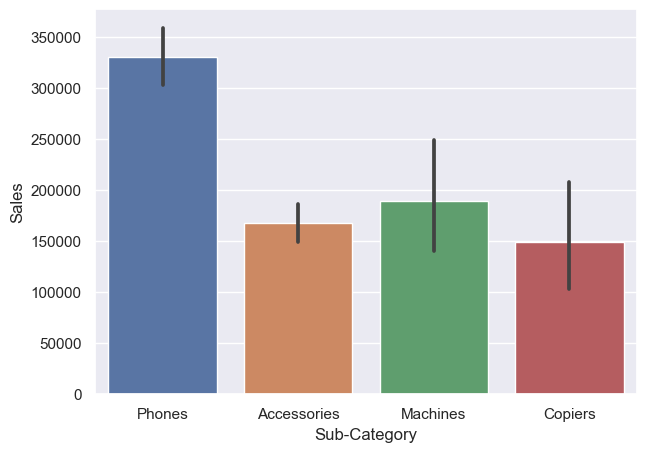

In [121]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Sub-Category' , y='Sales' , data=df[df['Category']=='Technology'] , estimator=sum) 

In [42]:
df[(df['Sub-Category']=='Machines') & (df['Profit']<0)]['Profit'].sum() # He loss in machines -30,118.66 for all years

-30118.668200000004

In [43]:
df[(df['Sub-Category']=='Machines') & (df['Profit']>0)]['Profit'].sum() # He Makes in machines 33,503.4251 for all years 

33503.4251

In [44]:
df[(df['Sub-Category']=='Machines') & (df['Profit']>0)]['Profit'].sum() + (df[(df['Sub-Category']=='Machines') & (df['Profit']<0)]['Profit'].sum()) # General formula for how much he make in Machines

3384.7568999999967

Grapgh shows The profit in technology with SubCategory of technology,, we notice that he loss in machines every year

<AxesSubplot:xlabel='year', ylabel='Profit'>

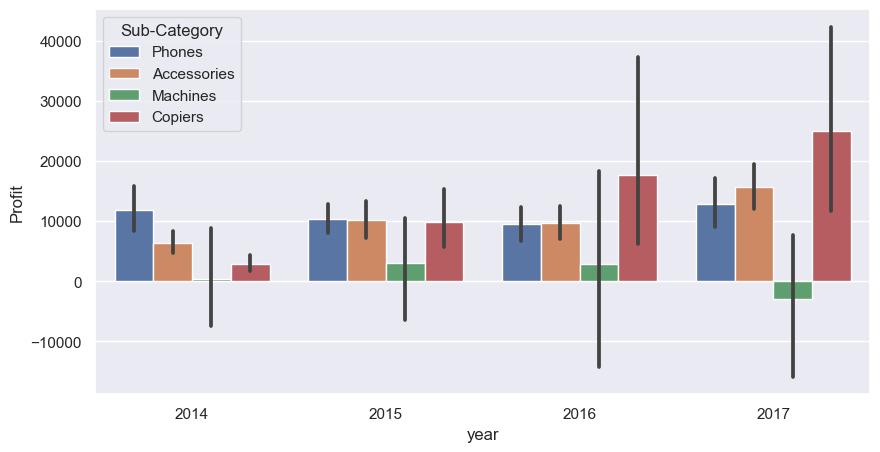

In [45]:
sns.set(rc={'figure.figsize':(10,5)}) # In technology Category during year
sns.barplot(x='year' , y='Profit' , data=df[df['Category']=='Technology'] , estimator=sum , hue='Sub-Category') # The machines sub-category has less profit !

In [46]:
df[df['Sub-Category']=='Machines']['Profit'].sum() # He makes 3384 profit only on machines for all years!

3384.756899999989

In [47]:
df[df['Category']=='Technology'].groupby(['Sub-Category'])['Profit'].sum() # All sub-category of the technology with his Profits.

Sub-Category
Accessories    41936.6357
Copiers        55617.8249
Machines        3384.7569
Phones         44515.7306
Name: Profit, dtype: float64

In [185]:
df_negative_prof[df_negative_prof['Sub-Category']=='Machines']['Profit'].sum() # He make negative profit on machines around -30118.668 for all years

-30118.668200000004

Grapgh shows that how much he loss every year and at which category 

<AxesSubplot:xlabel='year', ylabel='Profit'>

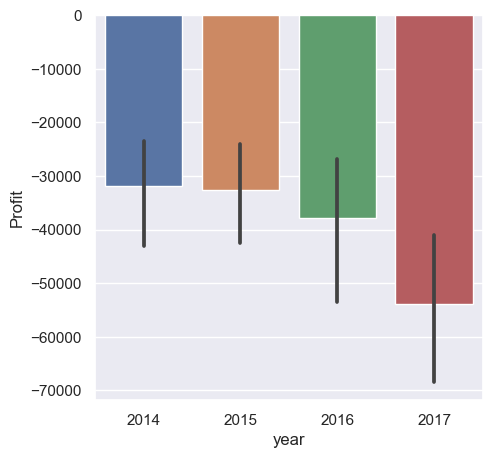

In [51]:
# Grapgh that shows how much he loss every year
df_negative_prof=df[df['Profit']<0]
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='year' , y='Profit' , data=df_negative_prof , estimator=sum)

<AxesSubplot:xlabel='year', ylabel='Profit'>

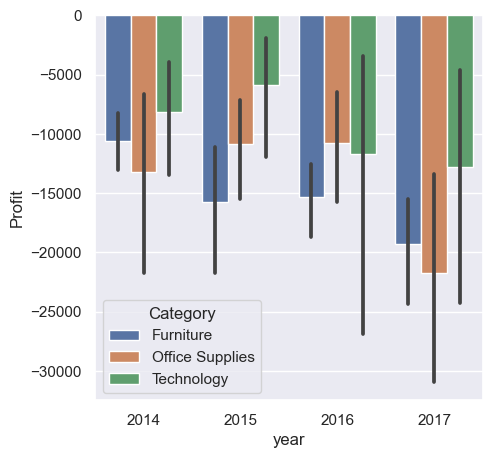

In [52]:
# At which category he loss ?
sns.barplot(x='year' , y='Profit' , data=df_negative_prof , estimator=sum , hue='Category')

How much he make in office supplies ?

In [53]:
df[df['Category']=='Office Supplies'].groupby(['Sub-Category'])['Profit'].sum()

Sub-Category
Appliances    18138.0054
Art            6527.7870
Binders       30221.7633
Envelopes      6964.1767
Fasteners       949.5182
Labels         5546.2540
Paper         34053.5693
Storage       21278.8264
Supplies      -1189.0995
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Profit'>

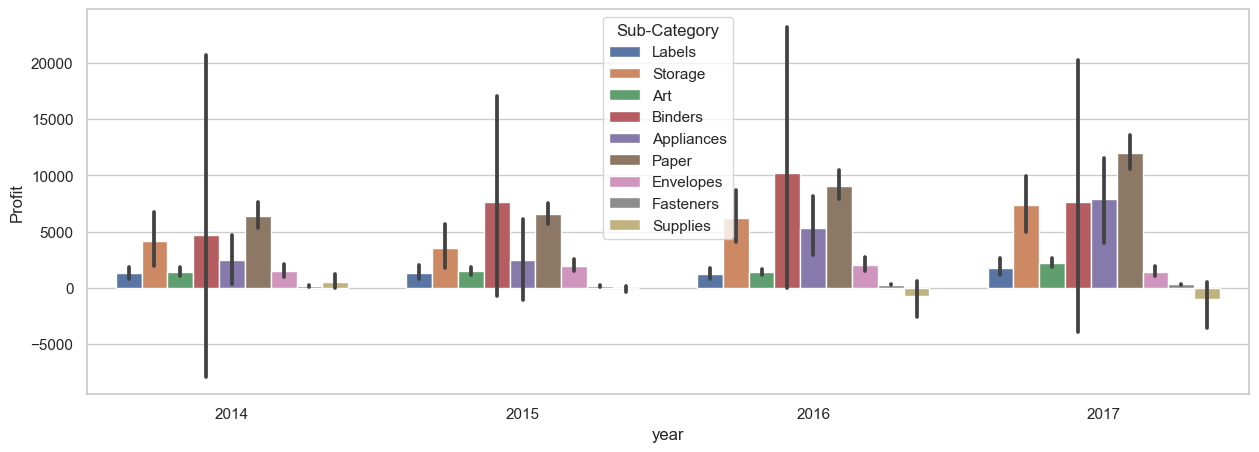

In [54]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_theme(style="whitegrid")
sns.barplot(x='year' , y='Profit' , data=df[df['Category']=='Office Supplies'] , estimator=sum , hue='Sub-Category') # Grapgh for Office suppliers

In [224]:
# The best product name he sell
df[(df['Sub-Category']=='Binders')]['Product Name'].value_counts()

Avery Non-Stick Binders                                       20
Storex Dura Pro Binders                                       17
GBC Premium Transparent Covers with Diagonal Lined Pattern    14
Ibico Plastic Spiral Binding Combs                            13
Wilson Jones Turn Tabs Binder Tool for Ring Binders           13
                                                              ..
Fellowes Presentation Covers for Comb Binding Machines         2
GBC Therma-A-Bind 250T Electric Binding System                 2
Durable Pressboard Binders                                     2
Wilson Jones Hanging Recycled Pressboard Data Binders          2
Wilson Jones DublLock D-Ring Binders                           2
Name: Product Name, Length: 211, dtype: int64

Piviot table shows The sub Cetgoreis with negative and positive Profit idexed by Year .

In [55]:
df.pivot_table(values='Profit', index='year' , columns='Sub-Category' , aggfunc='sum') 

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
year,,,,,,,,,,,,,,,,,
2014,6402.7150,2459.4999,1406.8031,4739.7160,-346.1707,6955.0470,2912.9433,1495.4788,178.5583,1972.8919,1286.0042,369.1689,6371.0214,11808.0053,4166.2788,490.0556,-3124.0427
2015,10197.2752,2511.8957,1485.0582,7596.6714,-2755.2302,6228.4161,9930.2988,1960.1906,171.9376,3051.8189,1323.0286,2977.4856,6570.1700,10398.8074,3505.4601,-24.8784,-3509.8019
2016,9664.2885,5301.3415,1413.9626,10215.6341,212.4710,5763.1539,17742.7926,2066.7483,294.0734,3935.2700,1192.6119,2907.3180,9071.5345,9459.5929,6204.2868,-698.9639,-2950.9418
2017,15672.3570,7865.2683,2221.9631,7669.7418,-583.6261,7643.5493,25031.7902,1441.7590,304.9489,4099.1628,1744.6093,-2869.2156,12040.8434,12849.3250,7402.8007,-955.3128,-8140.6947


We can see here how much he make in all categories 

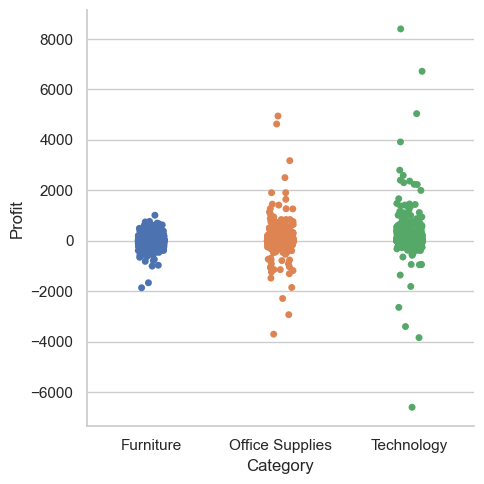

In [56]:
sns.catplot(x='Category' , y='Profit' , data=df , estimator=sum) # Here we can handle the furniture category !

We notice from the graph the profit of Furniture is between 1000 and -1000 that mean he make no much diffrence in profit 
otherwise the Technology and office Supplies has much profit above the zero and it makes a big diffrence in Profit

Table shows that how much he sales and how much the income ?

In [57]:
df_best_sub_categories=pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum().sort_values('Sales',ascending=False)) # Table that shows every sub-category sales and how much profit he gets 
df_best_sub_categories

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


Grapgh shows the correlation between sales and Profit for each year .

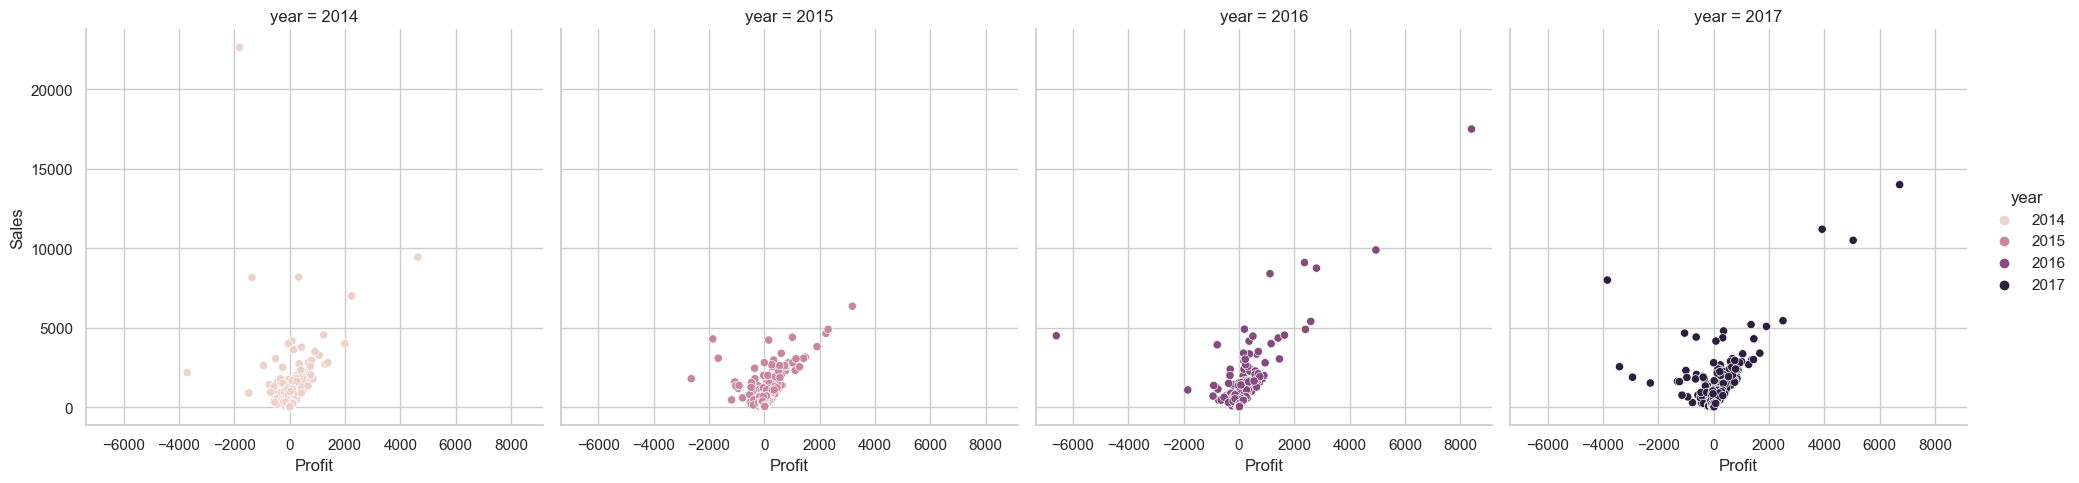

In [58]:
sns.relplot(data=df, x="Profit", y="Sales" , hue='year' , col='year' )

At this graph we notice that he continue on the same strategy every year that reason why he increase in the Profit every year

 Make a new column for months.

In [11]:
df['month']=df['Order Date'].dt.month
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


Piviot table that shwos profit per year pear month

In [64]:
pd.pivot_table(df,index=['year'],columns='month',values='Profit',aggfunc='sum') 

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,2450.1907,862.3084,498.7299,3488.8352,2738.7096,4976.5244,-841.4826,5318.1050,8328.0994,3448.2573,9292.1269,8983.5699
2015,-3281.0070,2813.8508,9732.0978,4187.4962,4667.8690,3335.5572,3288.6483,5355.8084,8209.1627,2817.3660,12474.7884,8016.9659
2016,2824.8233,5004.5795,3611.9680,2977.8149,8662.1464,4750.3781,4432.8779,2062.0693,9328.6576,16243.1425,4011.4075,17885.3093
2017,7140.4391,1613.8720,14751.8915,933.2900,6342.5828,8223.3357,6952.6212,9040.9557,10991.5556,9275.2755,9690.1037,8483.3468


Piviot table that shwos profit per year pear month with Categories

In [65]:
pd.pivot_table(df,index=['year','Category'],columns='month',values='Profit',aggfunc='sum')

month                        1          2           3          4          5   \
year Category                                                                  
2014 Furniture         805.4665   120.6917  -1128.6550   554.3801  -349.8776   
     Office Supplies   788.9506   176.0910   1270.4133  1000.2086  1747.2044   
     Technology        855.7736   565.5257    356.9716  1934.2465  1341.3828   
2015 Furniture       -3014.2000   394.8948   1455.0573   338.6502   900.5847   
     Office Supplies   589.8969  1814.1018   5407.8482  1477.3596  1731.6139   
     Technology       -856.7039   604.8542   2869.1923  2371.4864  2035.6704   
2016 Furniture         303.9607   377.0352   -555.2680   364.8334  1824.4739   
     Office Supplies  1604.4712  1330.0009   1061.4056 -1100.4821  2397.5024   
     Technology        916.3914  3297.5434   3105.8304  3713.4636  4440.1701   
2017 Furniture         -39.4402  -199.0421   1000.8532   202.4624   -72.8829   
     Office Supplies  3260.4467   953.8253   2715.9624  3370.6015  3153.7260   
     Technology       3919.4326   859.0888  11035.0759 -2639.7739  3261.7397   

month                        6          7          8          9           10  \
year Category                                                                  
2014 Furniture         596.3153   374.2467   663.4717  1858.5976    249.1645   
     Office Supplies  3031.4326 -2482.0172  2767.6007  6699.5402   1117.6406   
     Technology       1348.7765  1266.2879  1887.0326  -230.0384   2081.4522   
2015 Furniture        -412.6597  -325.0938  -487.4709  1350.1185   -605.5163   
     Office Supplies  2195.3864  1113.7829  2208.7531  2037.8837   1090.9375   
     Technology       1552.8305  2499.9592  3634.5262  4821.1605   2331.9448   
2016 Furniture        -106.2665  1038.9073  -494.1457   702.6025   -144.6600   
     Office Supplies  2467.4894  1123.9602  1629.1913  3714.0417   4680.0550   
     Technology       2389.1552  2270.0104   927.0237  4912.0134  11707.7475   
2017 Furniture         904.9956   324.6244   322.2390  1548.6837  -2526.9203   
     Office Supplies  3378.9821  2563.2845  6067.8582  4847.7438   4040.7751   
     Technology       3939.3580  4064.7123  2650.8585  4595.1281   7761.4207   

month                        11          12  
year Category                                
2014 Furniture        -297.8958   2011.8198  
     Office Supplies  4411.9560   2064.3953  
     Technology       5178.0667   4907.3548  
2015 Furniture        2992.0240    428.8141  
     Office Supplies  2800.0289   2631.9409  
     Technology       6682.7355   4956.2109  
2016 Furniture         819.8088   2828.6715  
     Office Supplies  4686.9250  11466.6686  
     Technology      -1495.3263   3589.9692  
2017 Furniture         406.0637   1146.7548  
     Office Supplies  3609.1029   1774.3132  
     Technology       5674.9371   5562.2788

Plot shwos the profit during months in all years

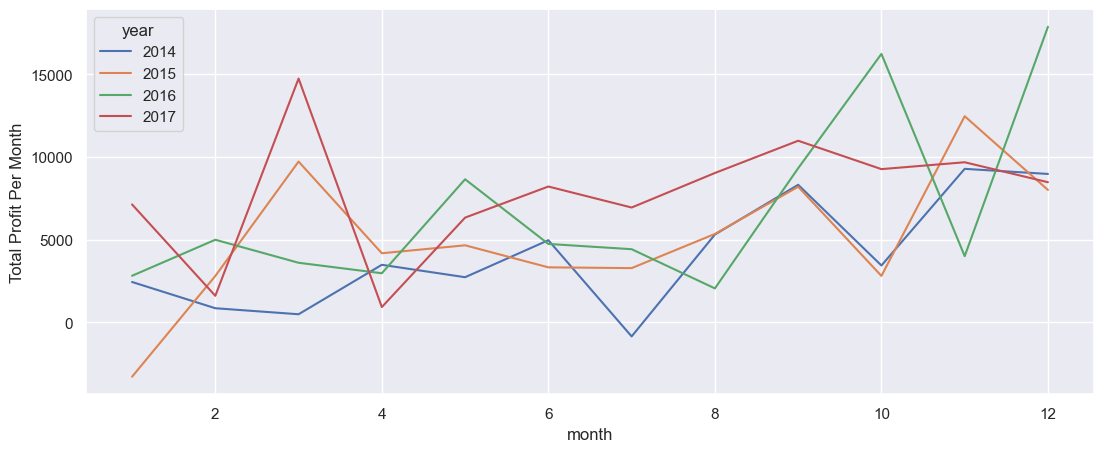

In [231]:
pd.pivot_table(df,index=['month'],columns='year',values='Profit',aggfunc='sum').plot() 
plt.ylabel('Total Profit Per Month');

Plot shwos the Sales during months in all years

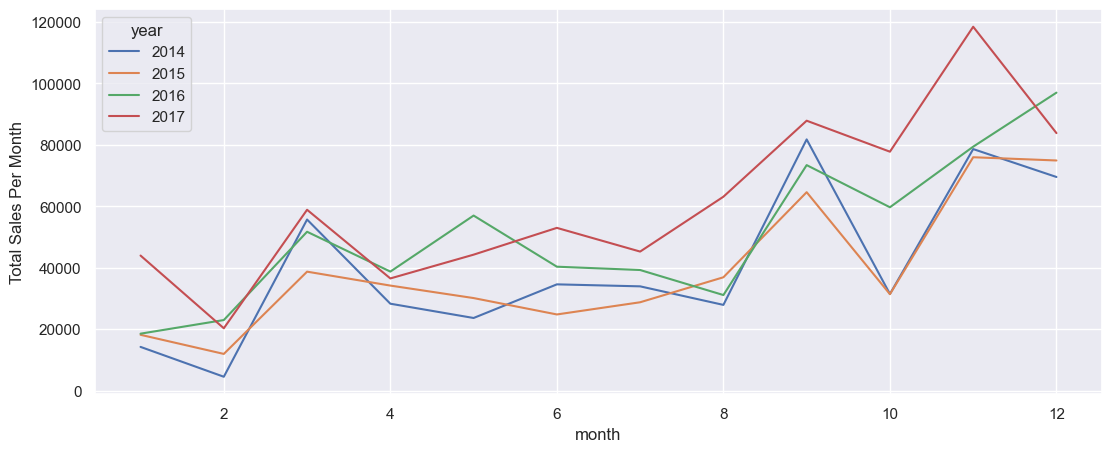

In [224]:
pd.pivot_table(df,index=['month'],columns='year',values='Sales',aggfunc='sum').plot() 
plt.ylabel('Total Sales Per Month');

The Best top 3 months that have Profits for all years .

for 2014

In [225]:
df[df['year']==2014].groupby(['month'])['Profit'].sum().sort_values(ascending=False)[0:3]

month
11    9292.1269
12    8983.5699
9     8328.0994
Name: Profit, dtype: float64

for 2015

In [226]:
df[df['year']==2015].groupby(['month'])['Profit'].sum().sort_values(ascending=False)[0:3]

month
11    12474.7884
3      9732.0978
9      8209.1627
Name: Profit, dtype: float64

for 2016

In [227]:
df[df['year']==2016].groupby(['month'])['Profit'].sum().sort_values(ascending=False)[0:3]

month
12    17885.3093
10    16243.1425
9      9328.6576
Name: Profit, dtype: float64

for 2017

In [228]:
df[df['year']==2017].groupby(['month'])['Profit'].sum().sort_values(ascending=False)[0:3]

month
3     14751.8915
9     10991.5556
11     9690.1037
Name: Profit, dtype: float64

Graph Shows that Is he make more profit or sales if he has ordered more quantity ?  
We notice that he make more profit when the segments orders from 2 to 5 quantity

<AxesSubplot:xlabel='Quantity', ylabel='Sales'>

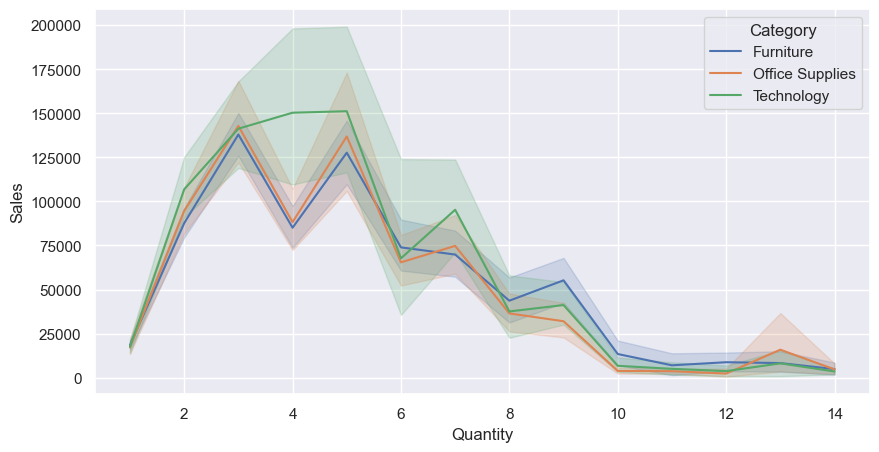

In [275]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='Quantity' , y='Sales' , data=df ,estimator=sum , hue='Category' )

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

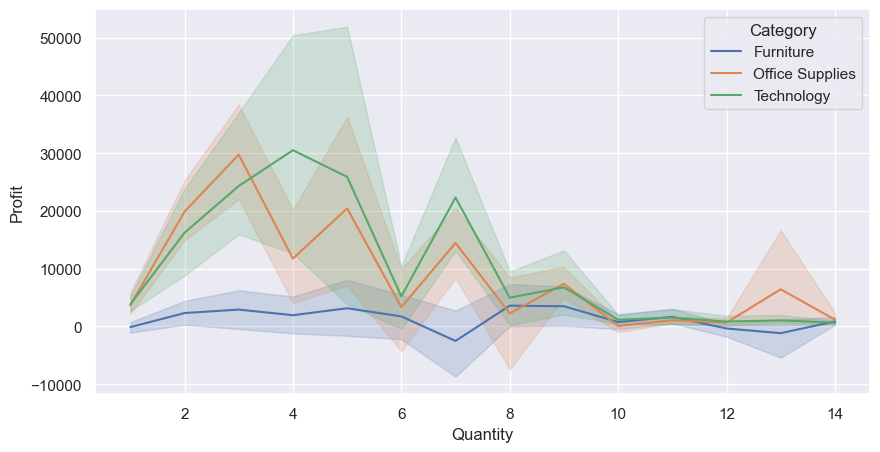

In [276]:
sns.lineplot(x='Quantity' , y='Profit' , data=df ,estimator=sum , hue='Category')

## Segment and Region Section  
1- What is the best segment make orders ?  
2- The Best Segments has sales and Profit  
3- The Best Region has Sales and Profit   
4- The Most Shipment Used


What is the best segment makes orders ?

<AxesSubplot:xlabel='Segment', ylabel='count'>

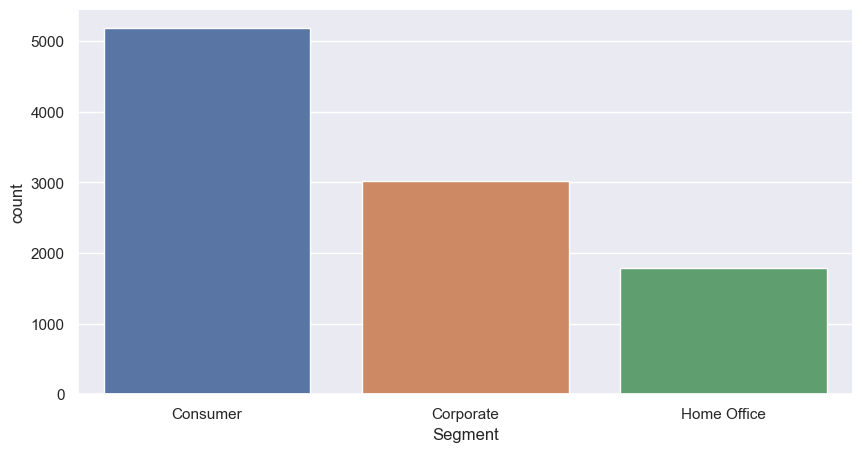

In [142]:
sns.countplot(x='Segment' , data=df)

Shows every segment profit at which category .

In [397]:
# shows every segment profit at which category .
df.groupby(['Segment','Category'])['Profit'].sum()

Segment      Category       
Consumer     Furniture           6991.0786
             Office Supplies    56330.3210
             Technology         70797.8096
Corporate    Furniture           7584.8158
             Office Supplies    40227.3202
             Technology         44166.9980
Home Office  Furniture           3875.3784
             Office Supplies    25933.1596
             Technology         30490.1405
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

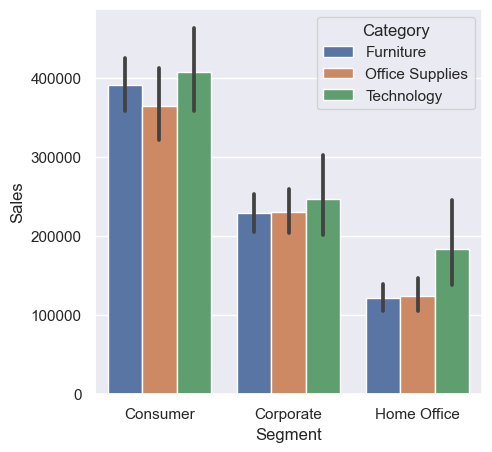

In [69]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Segment' , y='Sales' , estimator=sum , data=df , hue='Category') 

What is the best Segment has more Profit ?

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

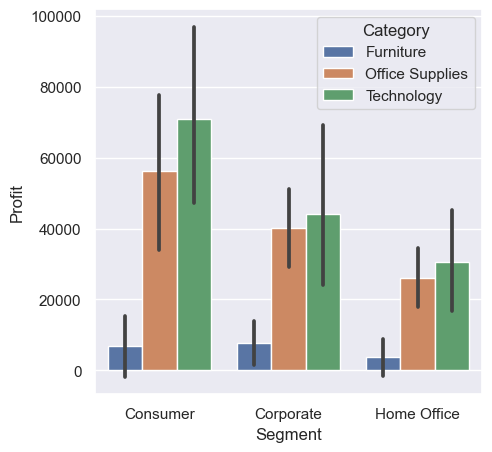

In [70]:
sns.barplot(x='Segment' , y='Profit' , estimator=sum , data=df , hue='Category') 

What is the best shipment is most used?

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

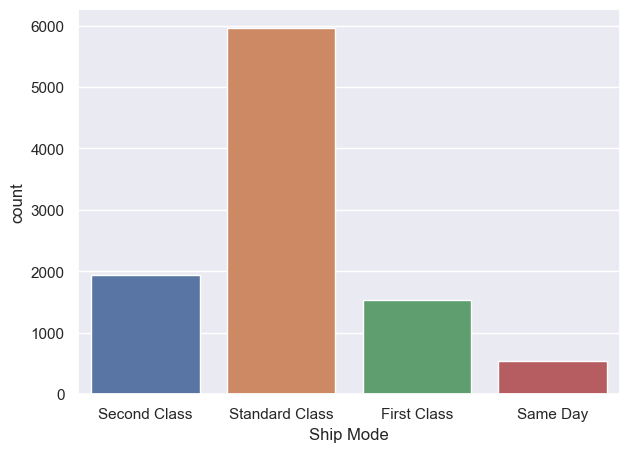

In [71]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(df['Ship Mode'])

What is the time spent on shipping for each Ship Mode ?

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

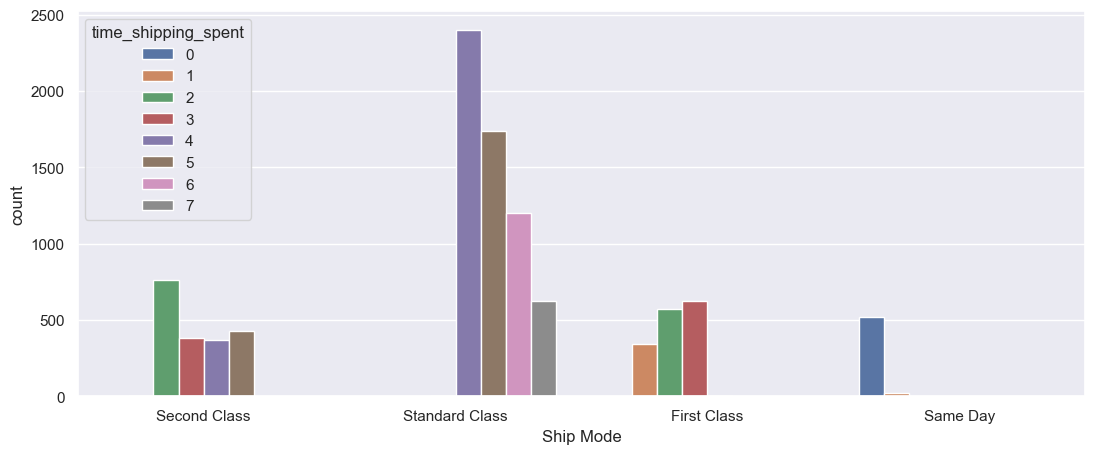

In [222]:
sns.set(rc={'figure.figsize':(13,5)})
sns.countplot(x='Ship Mode'  ,data=df , hue='time_shipping_spent')

Graph Shows the Correlation between The Profit and time_shipping_spent  
and we notice that he make loss in Technology When the time Shipping was 7 days , so he should focus on that to prevent the loss 

<AxesSubplot:xlabel='time_shipping_spent', ylabel='Profit'>

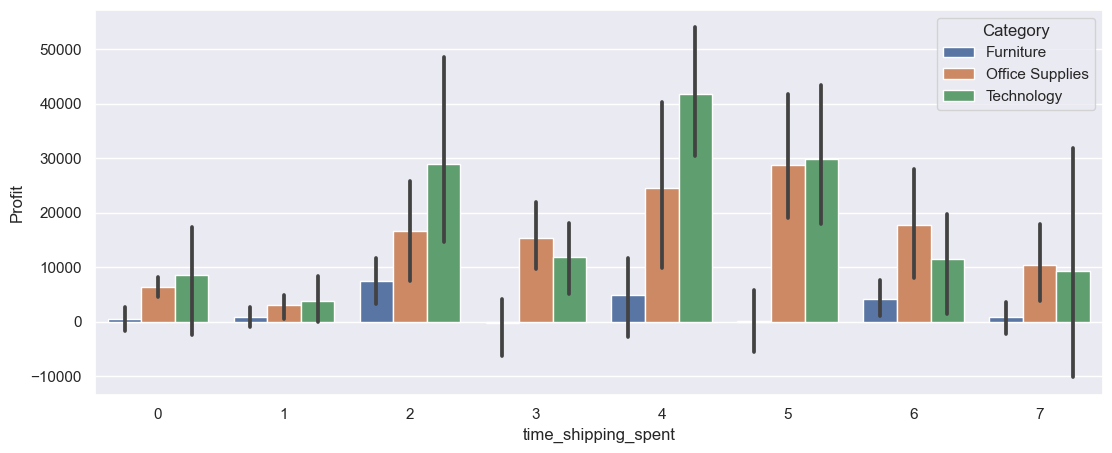

In [223]:
sns.barplot(x='time_shipping_spent', y='Profit' , data=df , estimator=sum, hue='Category')

In [72]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


Pie Chart shows the most regions has most Profit

<AxesSubplot:title={'center':'Most Region Profit'}, ylabel='Profit'>

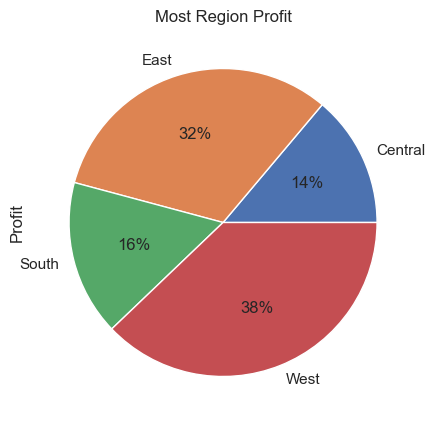

In [73]:
df.groupby(['Region'])['Profit'].sum().plot(kind='pie', y='Region' , autopct='%1.0f%%' , title='Most Region Profit') 

Pie Chart shows the most regions has most Sales

<AxesSubplot:title={'center':'Most Region Sales'}, ylabel='Sales'>

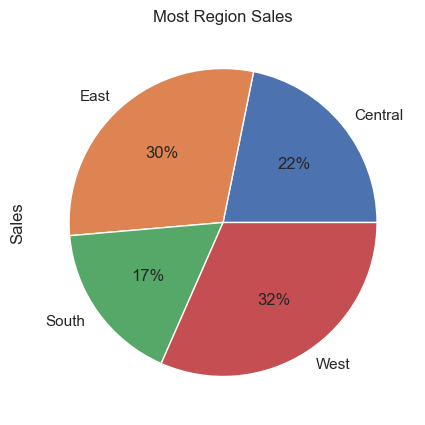

In [74]:
# The most Regions that has most Sales.
df.groupby(['Region'])['Sales'].sum().plot(kind='pie', y='Region' , autopct='%1.0f%%' , title='Most Region Sales')

What is the best Categories that make more Profit in each Region ?

<AxesSubplot:xlabel='Region', ylabel='Profit'>

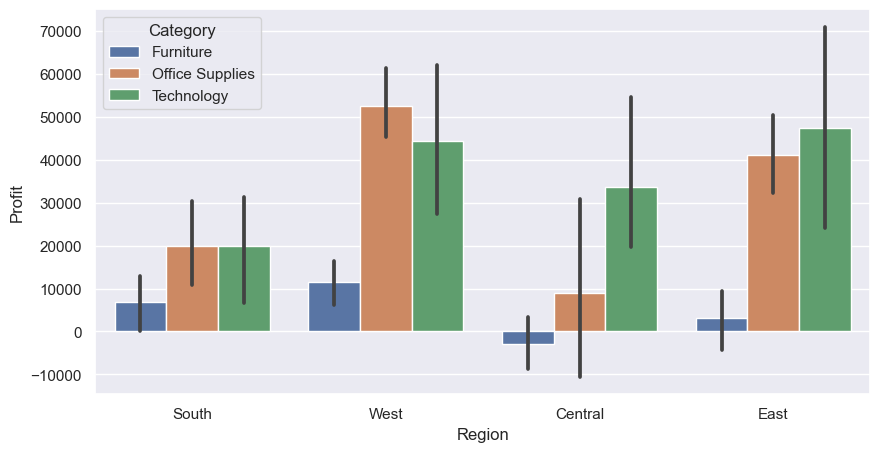

In [75]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Region' , y='Profit' , data=df , estimator=sum , hue='Category')

What is the best Segment that make more Sales in each Region ?

<AxesSubplot:xlabel='Region', ylabel='Sales'>

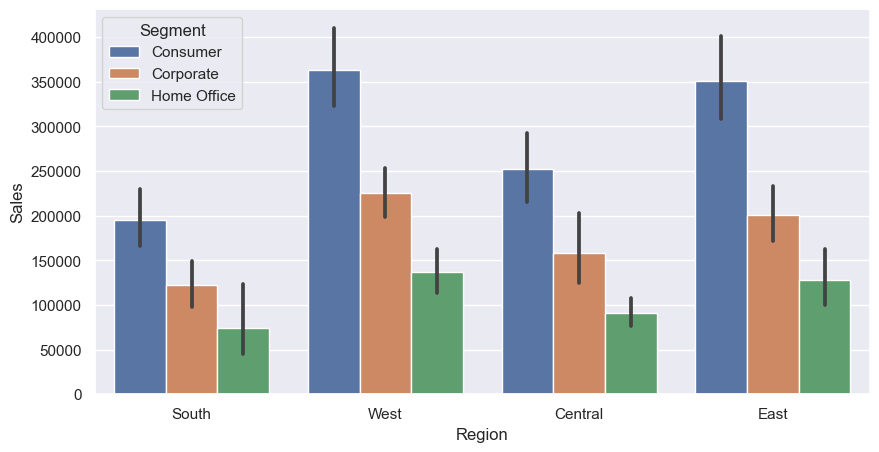

In [138]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Region' , y='Sales' , data=df , estimator=sum , hue='Segment')

How much sales The segments make over years ?

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

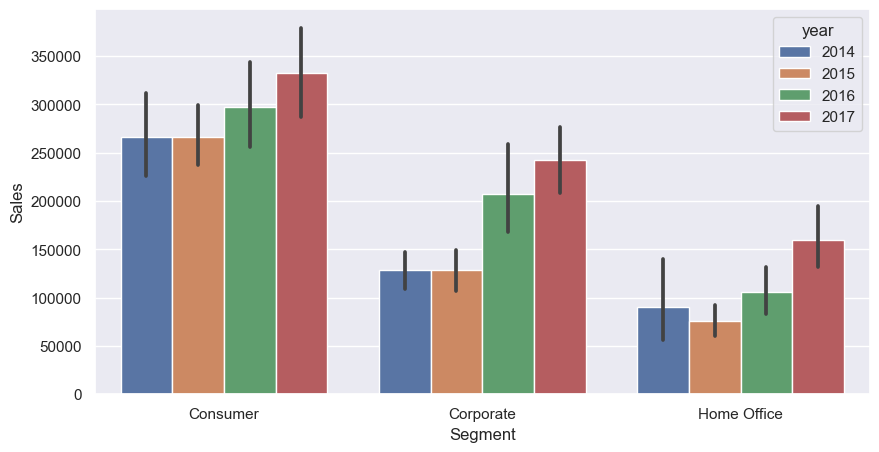

In [139]:
sns.barplot(x='Segment' , y='Sales' , data=df , estimator=sum , hue='year')

What is the Profit of segments During months ?

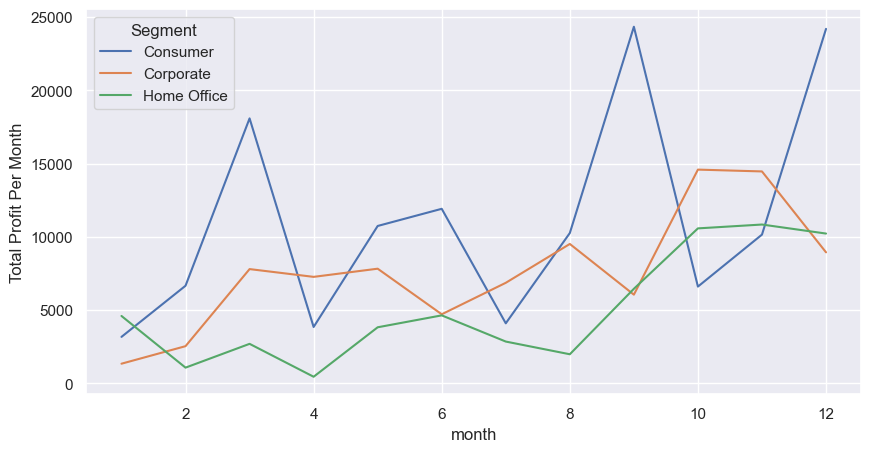

In [143]:
pd.pivot_table(df,index=['month'],columns='Segment',values='Profit',aggfunc='sum').plot() 
plt.ylabel('Total Profit Per Month');

How much he make from consumer and Coporate and home office Sales and Profit?

The Profit every segment make

In [234]:
print('Consumer :',df[df['Segment']=='Consumer']['Profit'].sum()) # Consumer
print('Home Office :',df[df['Segment']=='Home Office']['Profit'].sum()) # Home Office
print('Corporate :',df[df['Segment']=='Corporate']['Profit'].sum()) # Corporate

Consumer : 134119.20919999995
Home Office : 60298.67849999998
Corporate : 91979.13399999999


The sales every segments make 

In [233]:
print('Consumer Make :',df[df['Segment']=='Consumer']['Sales'].sum()) # Consumer
print('Home Office Make :',df[df['Segment']=='Home Office']['Sales'].sum()) # Home Office
print('Corporate Make :',df[df['Segment']=='Corporate']['Sales'].sum()) # Corporate

Consumer Make : 1161401.3449999997
Home Office Make : 429653.1485
Corporate Make : 706146.3668


In [441]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10


## Deal with Outliers  
1- Handle sales column   
2- Compute  Interquartile range  
3- Make visulazation at the outliers    
4- Compare the outliers data and the original data. 

BoxenPlot Shwos the Outliers in sales column

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

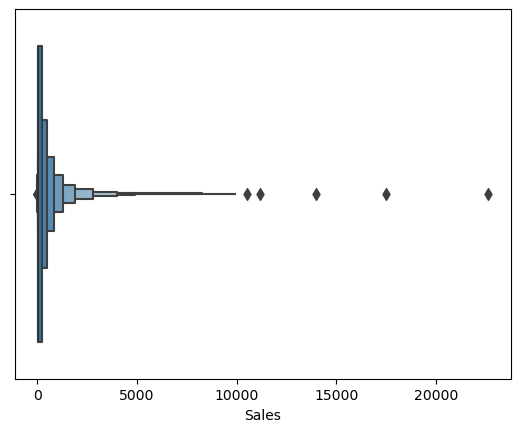

In [19]:
sns.boxenplot(df['Sales'])

Here we will calculate The IQR and make the range 2.5 of the sales and define the upper and lower limites to define the outliers

In [16]:
IQR=df['Sales'].quantile(0.75)-df['Sales'].quantile(0.25)
IQR

192.66

In [17]:
upper_limit=df['Sales'].quantile(0.75)+(2.5*IQR)
lower_limit=df['Sales'].quantile(0.25)-(2.5*IQR)
upper_limit,lower_limit

(691.5899999999999, -464.37)

New data frame with remove all the outliers

In [18]:
df_clean=df[(df['Sales']<=upper_limit)|(df['Sales']<=lower_limit)] 
df_clean

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,482.0064,2016,3,11
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,22.3686,2016,4,6
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,33.2724,2015,7,10
5,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,327.8506,2014,5,6
6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,27.1544,2014,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028,56.4924,2014,2,1
9990,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,168.2868,2017,5,2
9991,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,394.3284,2017,5,2
9992,2017-02-26,2017-03-03,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,105.0800,2017,5,2


Boxenplot shows the data after remove the outliers

/Users/immortal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

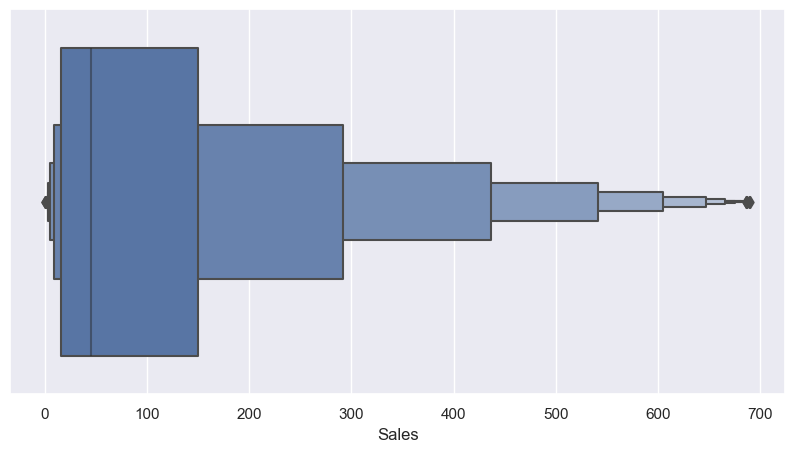

In [96]:
sns.boxenplot(df_clean['Sales'])

Save the outliers in new data frame to make visulazation

In [20]:
df_outliers=df[~(df['Sales']<=upper_limit)|(df['Sales']<=lower_limit)] 
df_outliers

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,4263.614400,2014,5,6
10,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,12199.215600,2014,5,6
11,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568,2848.200000,2014,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,2016-09-04,2016-09-04,Same Day,Ionia McGrath,Consumer,San Francisco,California,West,Technology,Copiers,Canon PC1060 Personal Laser Copier,2799.9600,5,0.20,944.9865,10254.853500,2016,0,9
9942,2014-12-28,2015-01-03,Standard Class,Maribeth Dona,Consumer,Anaheim,California,West,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.8200,9,0.00,29.9646,8959.415400,2014,6,12
9947,2017-06-01,2017-06-03,Second Class,Helen Wasserman,Corporate,Indianapolis,Indiana,Central,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464,11016.033600,2017,2,6
9948,2017-06-01,2017-06-03,Second Class,Helen Wasserman,Corporate,Indianapolis,Indiana,Central,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.2000,8,0.00,793.7160,18447.884000,2017,2,6


Rename Profit Columns for data clean and data with outliers

In [262]:
df_clean.rename(columns={'Profit':'Profit_clean'} , inplace=True)

/var/folders/rs/1v5sl0qn0zq960jj0_wjb06w0000gn/T/ipykernel_30961/2262327683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={'Profit':'Profit_clean'} , inplace=True)


In [264]:
df_outliers.rename(columns={'Profit':'Profit_outlier'} , inplace=True)

/var/folders/rs/1v5sl0qn0zq960jj0_wjb06w0000gn/T/ipykernel_30961/2559827400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers.rename(columns={'Profit':'Profit_outlier'} , inplace=True)


Compare with clean data and outlier data in Sales and Profit with Graph

In [269]:
# Calculate the profit of outliers and data without outliers
print('Profit of Outlier data Profit :' ,df_outliers['Profit_outlier'].sum())
print('Profit of Clean data Profit :',df_clean['Profit_clean'].sum())

Profit of Outlier data Profit : 169605.94179999997
Profit of Clean data Profit : 116791.07989999998


Graph Shows the Profit of clean and outlier data During months

<AxesSubplot:xlabel='month'>

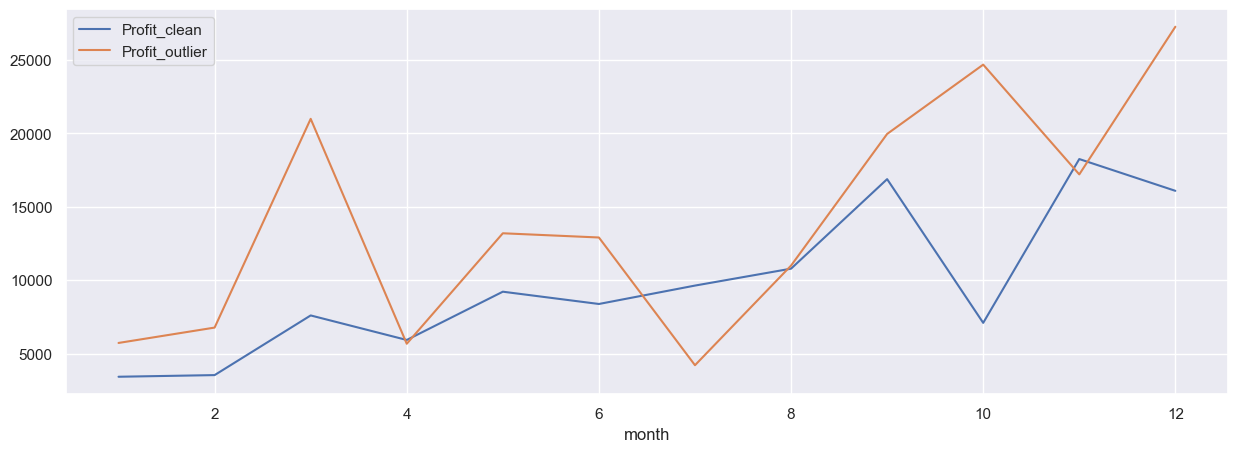

In [266]:
ax = pd.pivot_table(df_clean,index=['month'],values='Profit_clean',aggfunc='sum').plot(figsize=(15, 5) )
pd.pivot_table(df_outliers,index=['month'],values='Profit_outlier',aggfunc='sum').plot( ax=ax)

Graph shows the profit outliers data

<AxesSubplot:xlabel='Category', ylabel='Profit_outlier'>

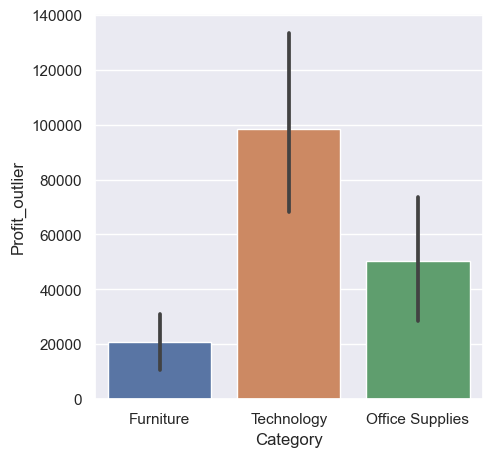

In [270]:
# He Make more profit in outliers technology 
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Category' , y='Profit_outlier' , estimator=sum , data=df_outliers ) 


Graph shows the profit data without outliers 

<AxesSubplot:xlabel='Category', ylabel='Profit_clean'>

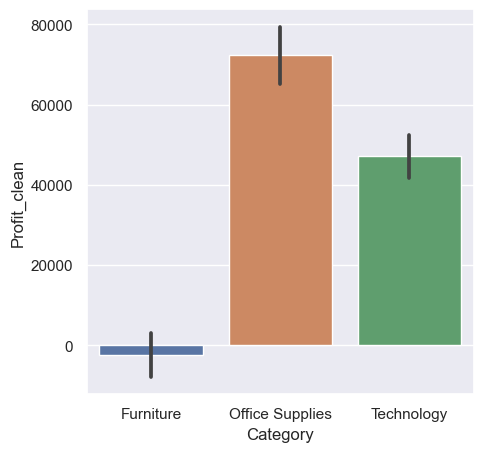

In [271]:
sns.barplot(x='Category' , y='Profit_clean' , estimator=sum , data=df_clean) # He lose Profit in the data without outliers

In [86]:
df_outliers[df_outliers['Profit']<0]['Profit'].sum() # he loss on outliers in range -78,703 

-78703.36570000001

In [87]:
df_clean[df_clean['Profit']<0]['Profit'].sum() # he loss on The clean data in range -77427.92

-77427.92000000001

In [89]:
df_outliers[df_outliers['Profit']>0]['Profit'].sum() # He make profit 248,309.30 in outliers

248309.30749999997

In [90]:
df_clean[df_clean['Profit']>0]['Profit'].sum() # He make Profit 194,218.99 in clean data without outliers 

194218.99989999997

### Conclusion :  
He make positive profit around 248,309 larger than  clean data ( The most data ) , the outliers data has 784 record only and the clean data  has 9210 record  
Also he make negative profit around -78,703 in outliers , The clean data make  -77,427 

In [88]:
df_outliers[df_outliers['Profit']<0]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10
27,2015-09-17,2015-09-21,Standard Class,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,12457.057200,2015,4,9
72,2015-04-26,2015-05-02,Standard Class,Joel Eaton,Consumer,Memphis,Tennessee,South,Furniture,Chairs,High-Back Leather Manager's Chair,831.9360,8,0.20,-114.3912,5438.781600,2015,6,4
165,2014-09-08,2014-09-12,Standard Class,Becky Martin,Consumer,San Antonio,Texas,Central,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.9520,8,0.40,-1359.9920,40527.761600,2014,4,9
167,2014-09-08,2014-09-12,Standard Class,Becky Martin,Consumer,San Antonio,Texas,Central,Furniture,Chairs,SAFCO Arco Folding Chair,1740.0600,9,0.30,-24.8580,10987.236000,2014,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712,2014-11-05,2014-11-10,Standard Class,Maribeth Dona,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Storage,Tennsco Double-Tier Lockers,1080.0960,6,0.20,-94.5084,5278.969200,2014,5,11
9748,2014-11-11,2014-11-15,Standard Class,Brosina Hoffman,Consumer,Chicago,Illinois,Central,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.9440,4,0.30,-56.9960,2291.239200,2014,4,11
9774,2014-07-26,2014-07-30,Standard Class,Luke Foster,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.5840,8,0.80,-3701.8928,7186.027200,2014,4,7
9787,2017-03-27,2017-04-01,Standard Class,Caroline Jumper,Consumer,Houston,Texas,Central,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320,5,0.32,-30.0980,3509.426800,2017,5,3


In [114]:
# The profit he make in outliers by Categories
df_outliers.groupby(['Category'])['Profit'].sum()

Category
Furniture          20944.5959
Office Supplies    50259.9673
Technology         98401.3786
Name: Profit, dtype: float64

Graph shows how much he make in Outliers data with Categories

<AxesSubplot:xlabel='year', ylabel='Profit'>

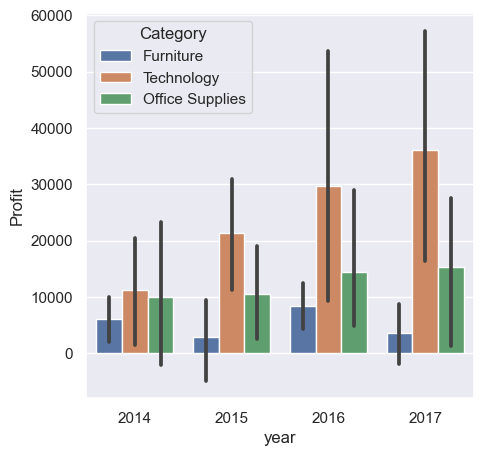

In [487]:
sns.barplot(x='year' , y='Profit' , data=df_outliers , estimator=sum , hue='Category')

What is the most Category ordered by Quantity in outliers Data ?

<AxesSubplot:xlabel='Category', ylabel='Quantity'>

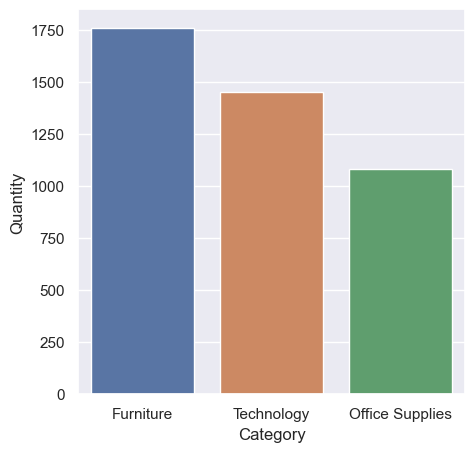

In [496]:
sns.set(rc={'figure.figsize':(5,5)})
df_quantity_=pd.DataFrame(df_outliers.groupby(['Category'])['Quantity'].sum().sort_values(ascending=False))
sns.barplot(data=df_quantity_ , x=df_quantity_.index , y=df_quantity_.Quantity ) # The Furniture has the most quantity and has The more less profit

We find the Most Category ordered by quantity is Furniture and it has the less Profit Compare to other categories

The Best Sub-Categoreis Profits in Outliers Data

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

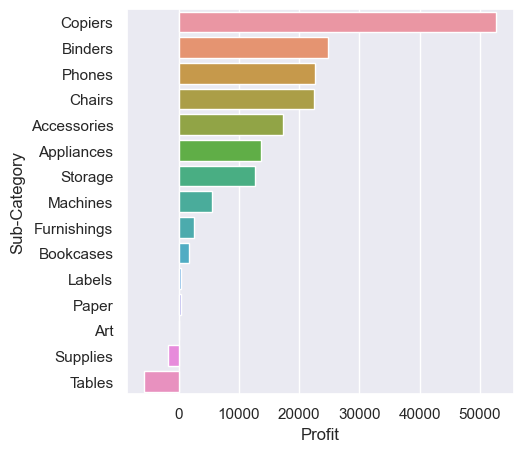

In [497]:
df_category_Profit_outlier=pd.DataFrame(df_outliers.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False)) # The best Sub-gategories Profites
sns.barplot(x='Profit' , y=df_category_Profit_outlier.index , data=df_category_Profit_outlier)

### Orders Section  
1- Define the best days that have orders  
2- Define the best montsh that have orders  
3- Define the best months that have much Sales and Profits  
4- Define The top 5 Sub-Category Sales at each month  
5- Define The Profit During Days

Make a new Column name day_order to know which day the order has been done 

In [12]:
df['day_order']=df['Order Date'].dt.day
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


The Most days that has orders count at which year

<AxesSubplot:xlabel='day_order', ylabel='count'>

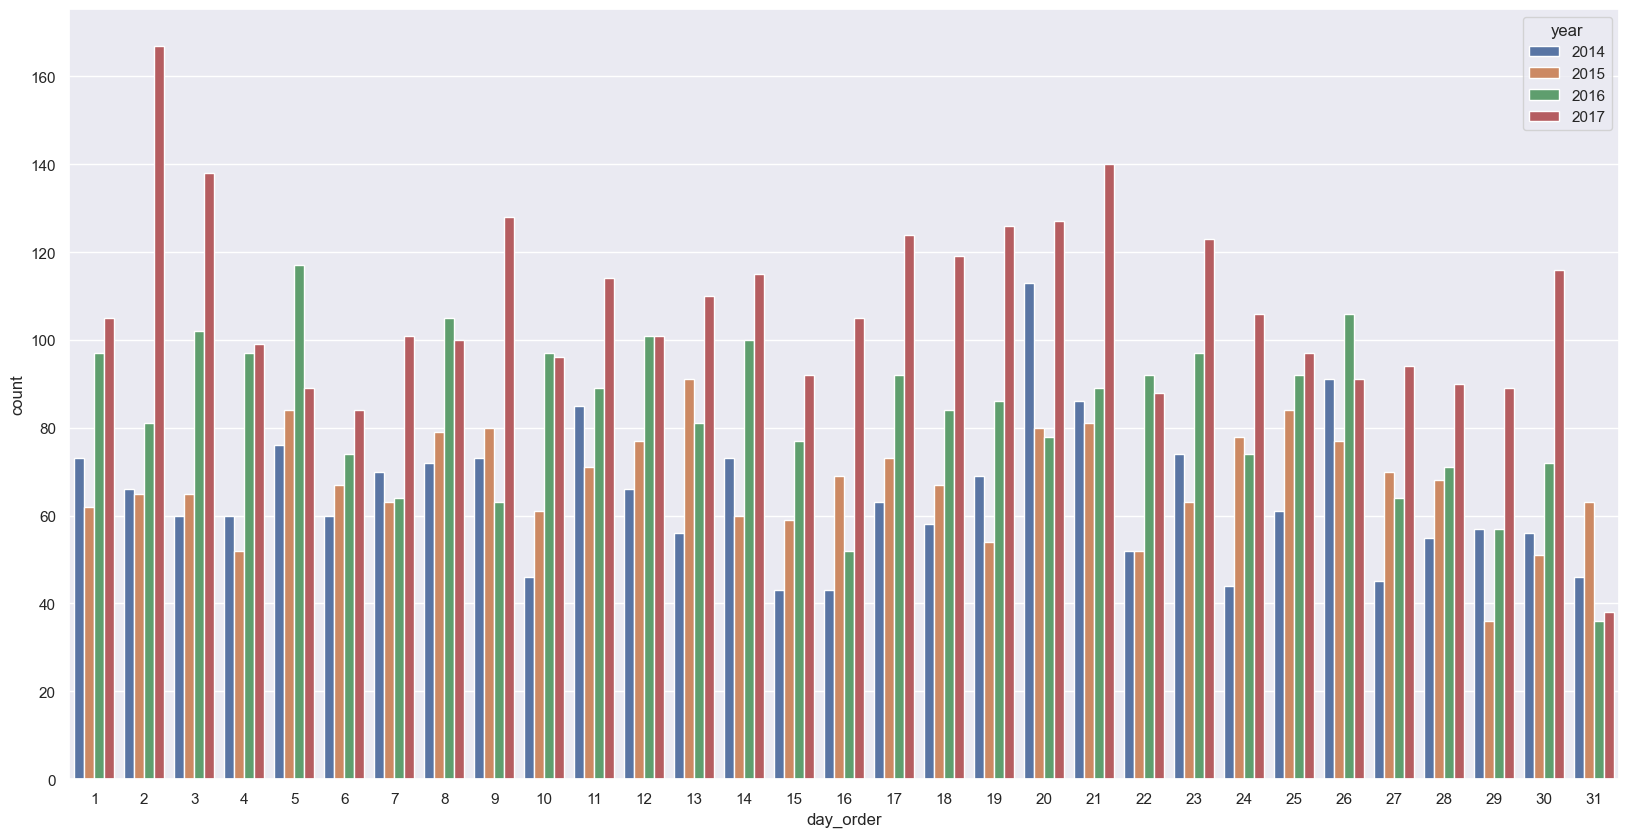

In [189]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='day_order' , data=df , hue='year')

The Most Months that has orders count

Table shows every month with his Profits with graph

In [531]:
df_best_month_profit=pd.DataFrame(df.groupby(['month'])['Profit'].sum().sort_values(ascending=False).reset_index())
df_best_month_profit

,month,Profit
0,12,43369.1919
1,9,36857.4753
2,11,35468.4265
3,10,31784.0413
4,3,28594.6872
5,5,22411.3078
6,8,21776.9384
7,6,21285.7954
8,7,13832.6648
9,4,11587.4363


<AxesSubplot:xlabel='month', ylabel='Profit'>

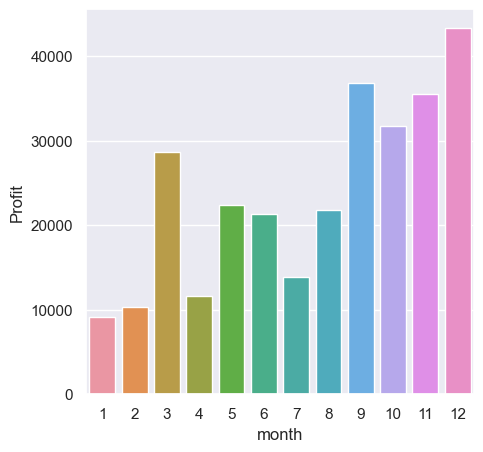

In [533]:
sns.barplot(x='month' , y='Profit' , data=df_best_month_profit , estimator=sum)

Graph shows the profit and Sales during months in Categories

<AxesSubplot:xlabel='month', ylabel='Profit'>

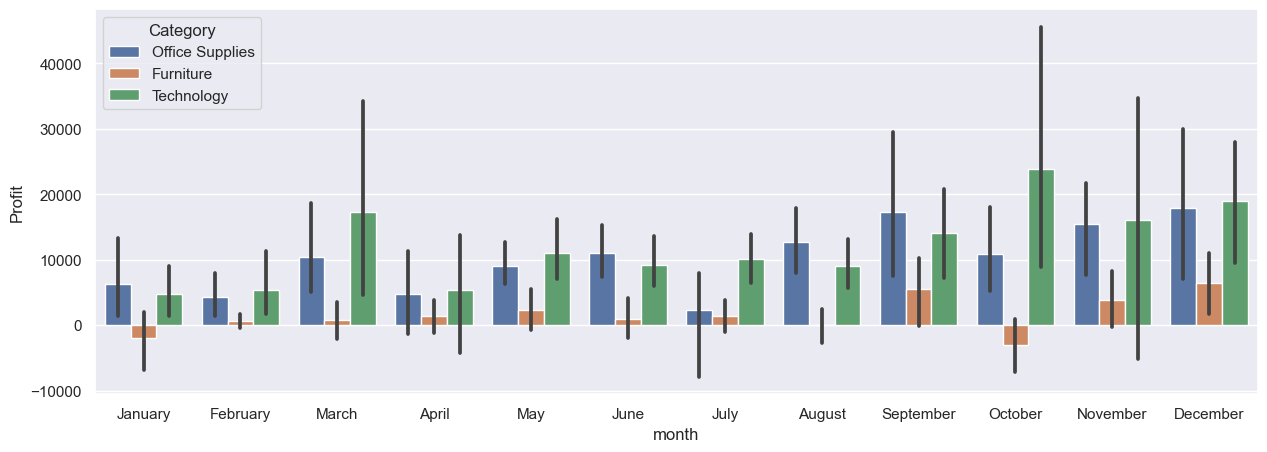

In [594]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='month' , y='Profit' , estimator=sum , data=df_new ,hue='Category')

<AxesSubplot:xlabel='month', ylabel='Sales'>

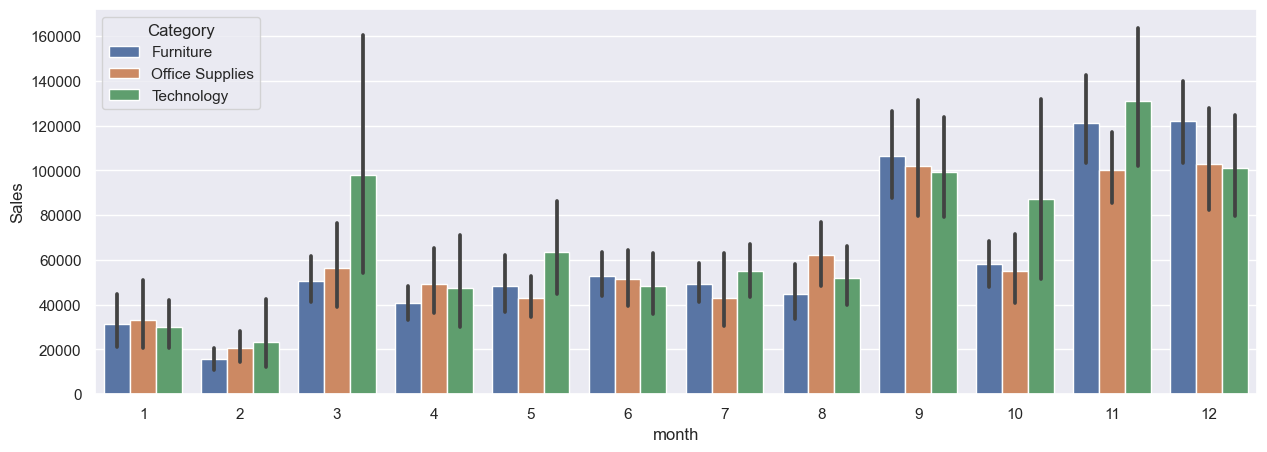

In [134]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='month' , y='Sales' , estimator=sum , data=df ,hue='Category')

We notice he has a more Profit in technology in the last months becaues The new Device versions are released at this time.

The Best Months has sales

Table shows every month with his Sales with graph

In [157]:
df_best_month_sales=pd.DataFrame(df.groupby(['month'])['Sales'].sum().sort_values(ascending=False).reset_index())
df_best_month_sales

,month,Sales
0,11,352461.0710
1,12,325293.5035
2,9,307649.9457
3,3,205005.4888
4,10,200322.9847
5,8,159044.0630
6,5,155028.8117
7,6,152718.6793
8,7,147238.0970
9,4,137480.7566


<AxesSubplot:xlabel='month', ylabel='Sales'>

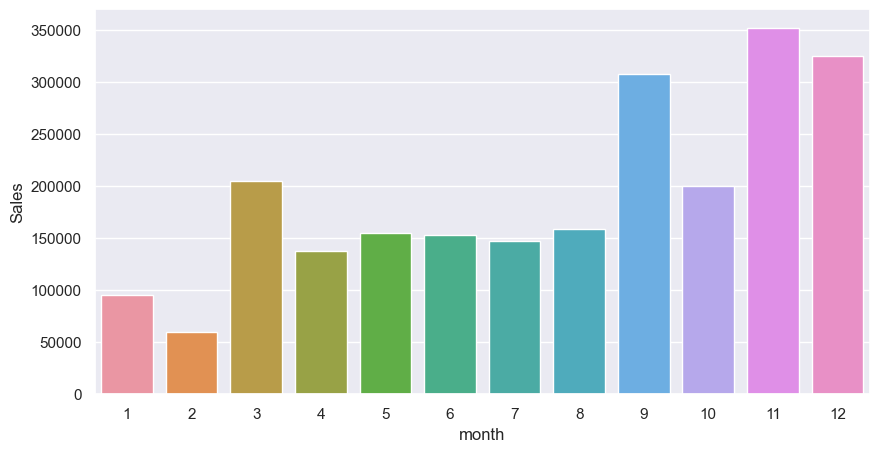

In [160]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='month' , y='Sales' , estimator=sum , data=df_best_month_sales )

In [176]:
df.groupby(['month' , 'Sub-Category'])['Sales'].sum().sort_values(ascending=False)

month  Sub-Category
12     Chairs          57429.049
11     Phones          56220.926
9      Chairs          51577.218
11     Chairs          47760.013
12     Tables          39193.258
                         ...    
2      Fasteners         159.312
3      Fasteners         149.636
6      Fasteners         115.504
5      Fasteners         109.302
1      Fasteners          87.660
Name: Sales, Length: 203, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Sales'>

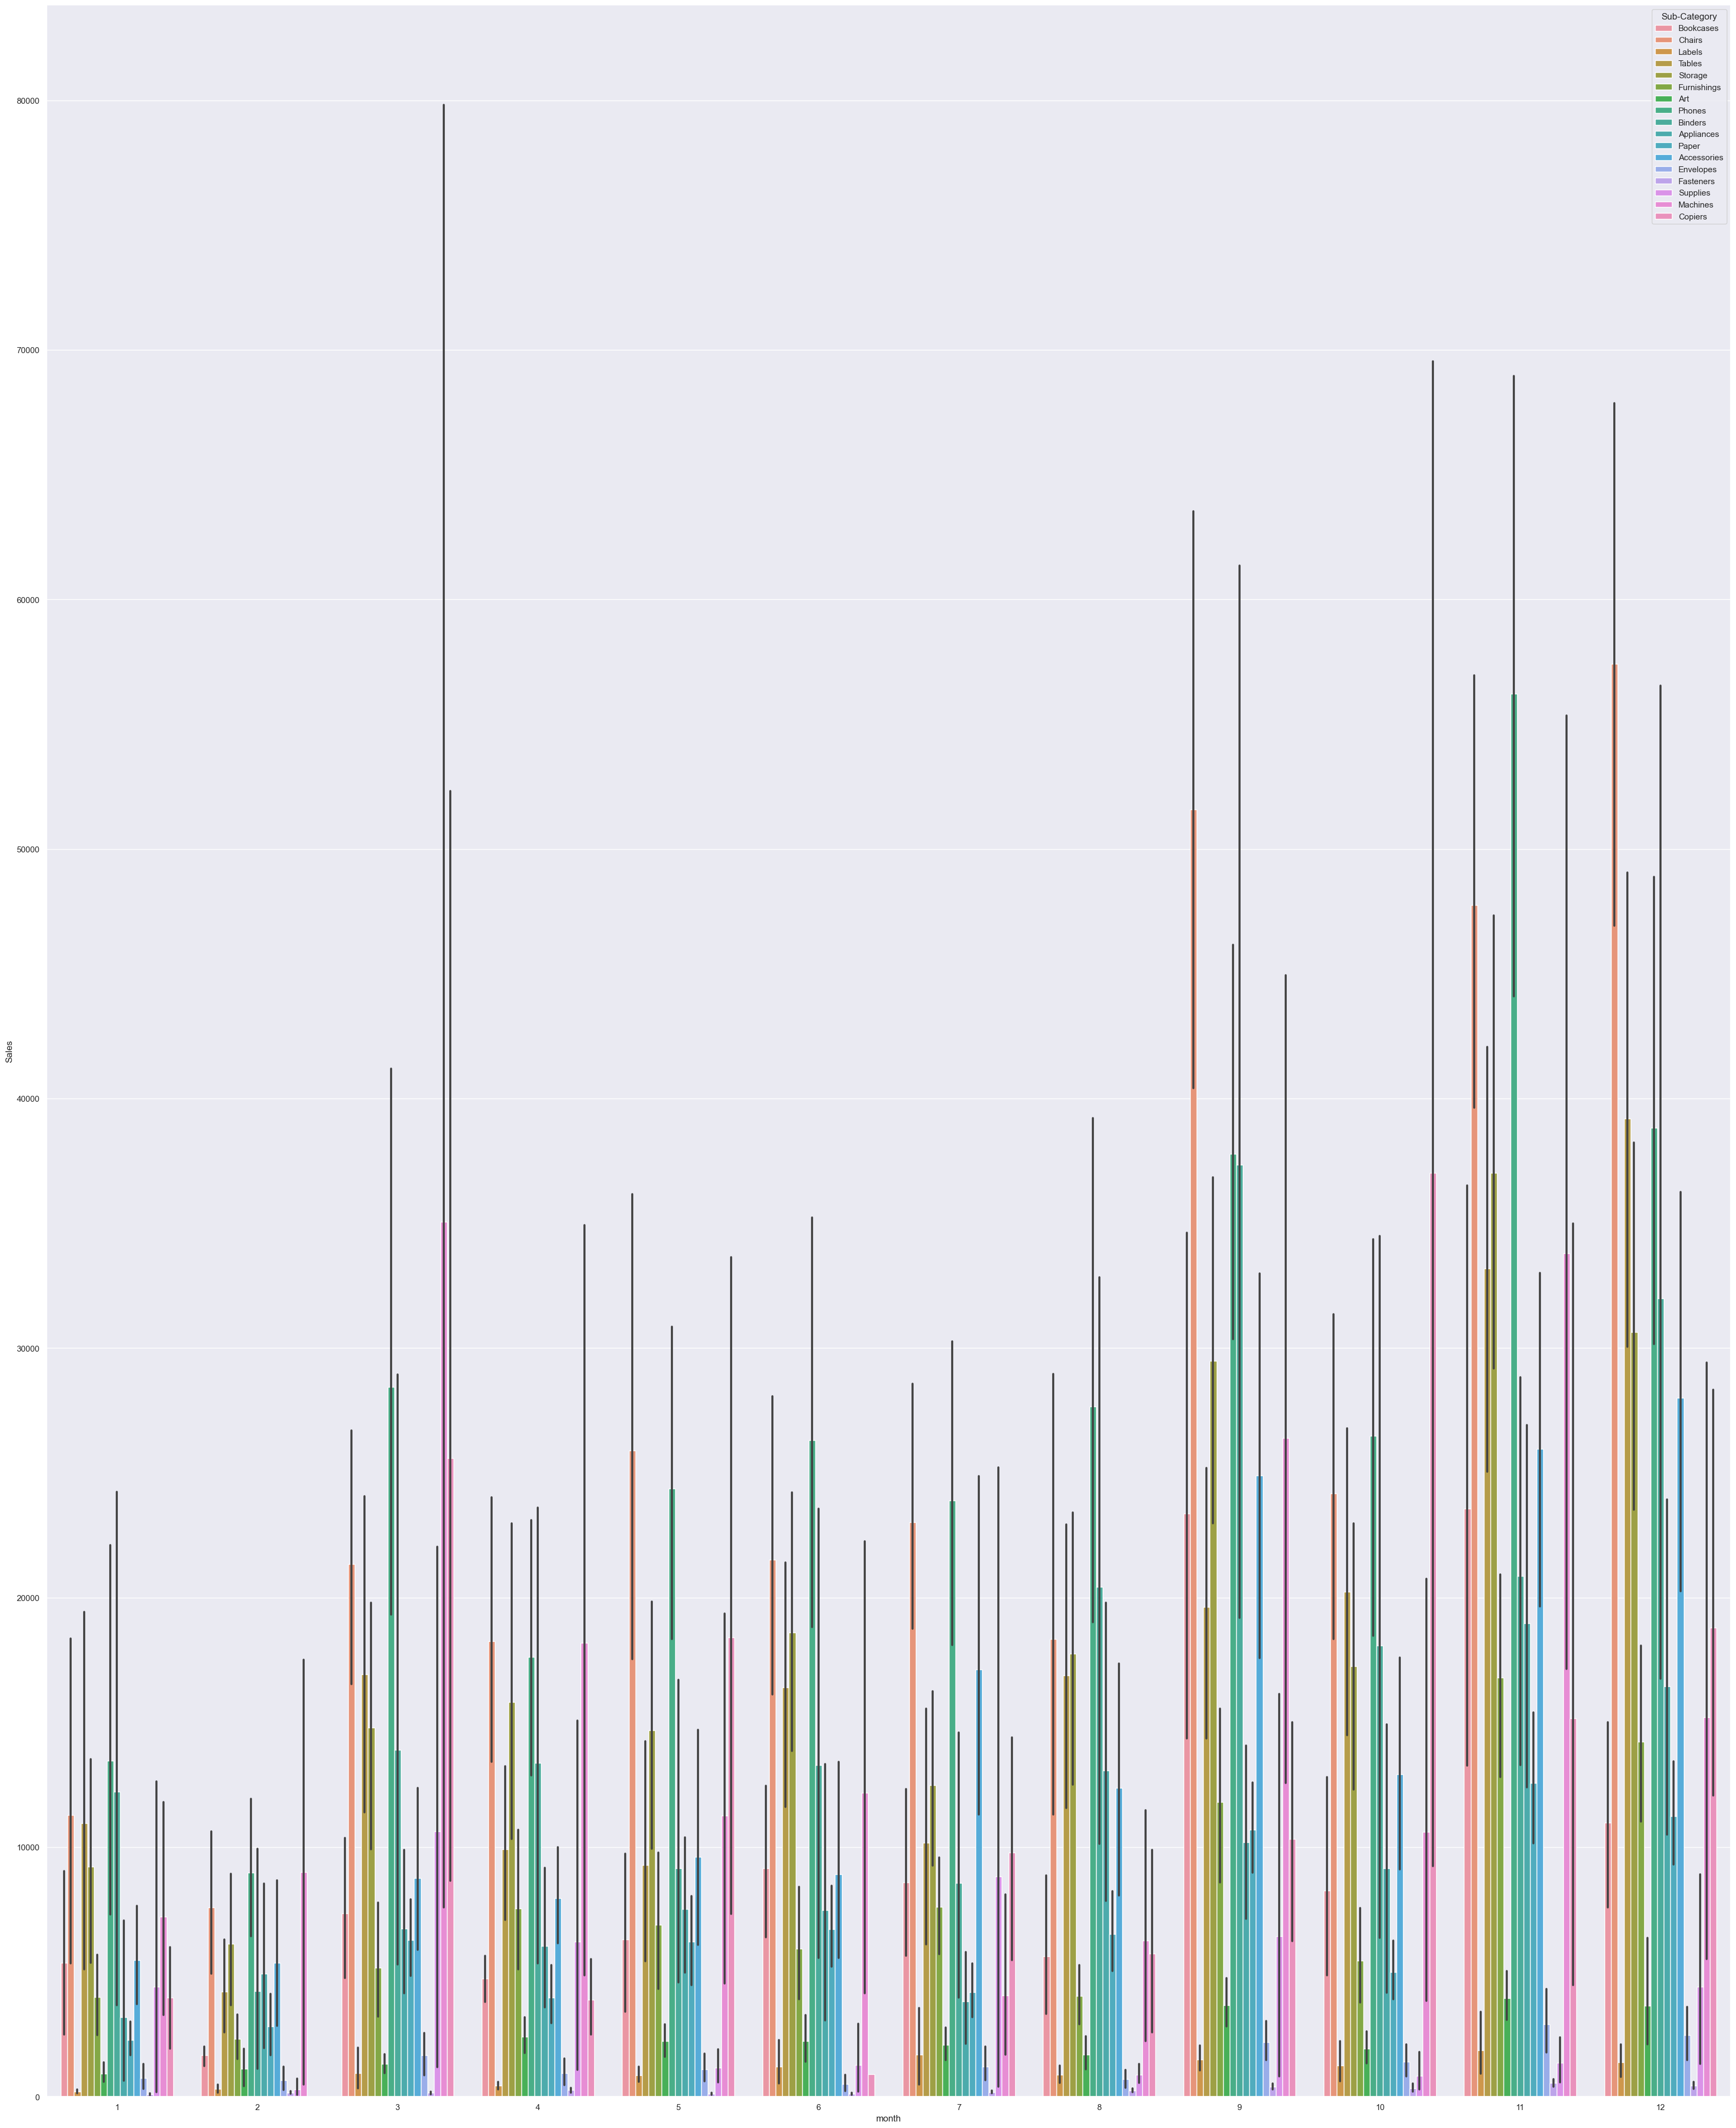

In [174]:
# The best Selling Sub-category during months
sns.set(rc={'figure.figsize':(40,50)})
sns.barplot(x='month' , y='Sales' , estimator=sum , data=df ,hue='Sub-Category')

Seems Like this graph is not understandable so we want to reduce some columns (coloumns that describe the graph well ), so we want only the top 5 Sub-Category sales in each month 

What is the Best Top Five Sub-Category Sales in each month ?

In [23]:
# First we Need to make a Data Frame Contains every Sub-Category Sales at months 
df_best_sub_month=pd.DataFrame(df.groupby(['month','Sub-Category'])['Sales'].sum().reset_index())
df_best_sub_month

,month,Sub-Category,Sales
0,1,Accessories,5477.9060
1,1,Appliances,3176.2440
2,1,Art,914.3700
3,1,Binders,12214.2010
4,1,Bookcases,5352.3586
...,...,...,...
198,12,Paper,11250.1220
199,12,Phones,38816.9020
200,12,Storage,30642.9680
201,12,Supplies,4401.9960


For loop to save many data Frames in a List (every element in a list contains single data frame that has top 5 sales at each month) then Concatenate these data frames in one Data Frame

In [31]:
# List of Data Frames
list1=[]
for i in list(df_best_sub_month['month'].unique()): # List of months(1,2,3,4,...,12)
    _df=pd.DataFrame(df_best_sub_month[df_best_sub_month['month']==i].sort_values(by='Sales')[:5]) # Save the data fram in variable that sorted by Sales and and take the top 5
    list1.append(_df) # Append every single data frame in the list
    
    
list1  # Display the list Of data Frames  

[    month Sub-Category     Sales
 8       1    Fasteners    87.660
 10      1       Labels   206.666
 7       1    Envelopes   749.896
 2       1          Art   914.370
 12      1        Paper  2263.622,
     month Sub-Category     Sales
 24      2    Fasteners   159.312
 31      2     Supplies   289.350
 26      2       Labels   299.882
 23      2    Envelopes   668.566
 19      2          Art  1117.514,
     month Sub-Category     Sales
 41      3    Fasteners   149.636
 43      3       Labels   940.108
 35      3          Art  1301.974
 40      3    Envelopes  1656.518
 42      3  Furnishings  5159.046,
     month Sub-Category     Sales
 58      4    Fasteners   258.404
 60      4       Labels   430.032
 57      4    Envelopes   945.282
 52      4          Art  2407.160
 56      4      Copiers  3879.892,
     month Sub-Category     Sales
 75      5    Fasteners   109.302
 77      5       Labels   863.118
 74      5    Envelopes  1096.060
 82      5     Supplies  1153.636
 69      5

In [42]:
df_result = pd.concat(list1) # Concatenate The data frames in one data frame
df_result

,month,Sub-Category,Sales
8,1,Fasteners,87.660
10,1,Labels,206.666
7,1,Envelopes,749.896
2,1,Art,914.370
12,1,Paper,2263.622
24,2,Fasteners,159.312
31,2,Supplies,289.350
26,2,Labels,299.882
23,2,Envelopes,668.566
19,2,Art,1117.514


Graph Shows The Top 5 Sub-Category in each month

<AxesSubplot:xlabel='month', ylabel='Sales'>

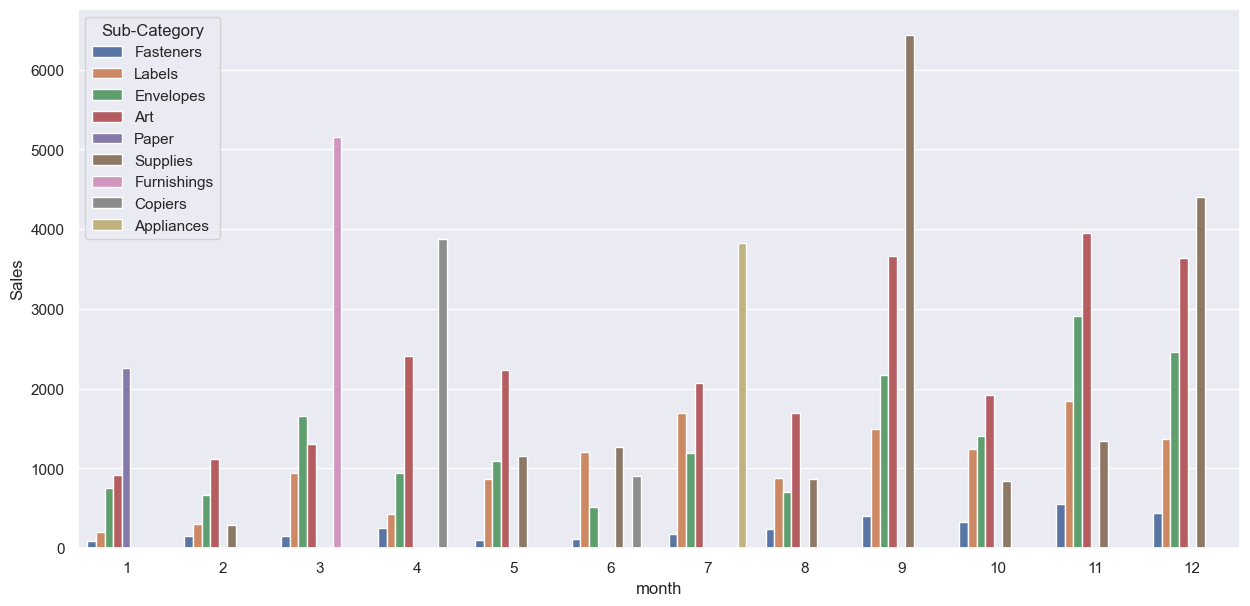

In [43]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='month' , y='Sales' , estimator=sum , data=df_result ,hue='Sub-Category')

The Profit During days of the month

<AxesSubplot:xlabel='day_order', ylabel='Profit'>

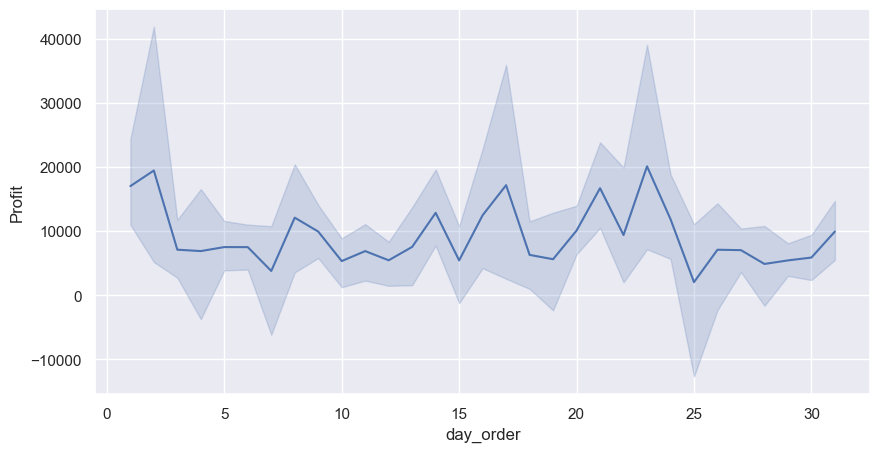

In [83]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='day_order' , y='Profit' , data=df , estimator=sum )

The Sales During days of the month

<AxesSubplot:xlabel='day_order', ylabel='Sales'>

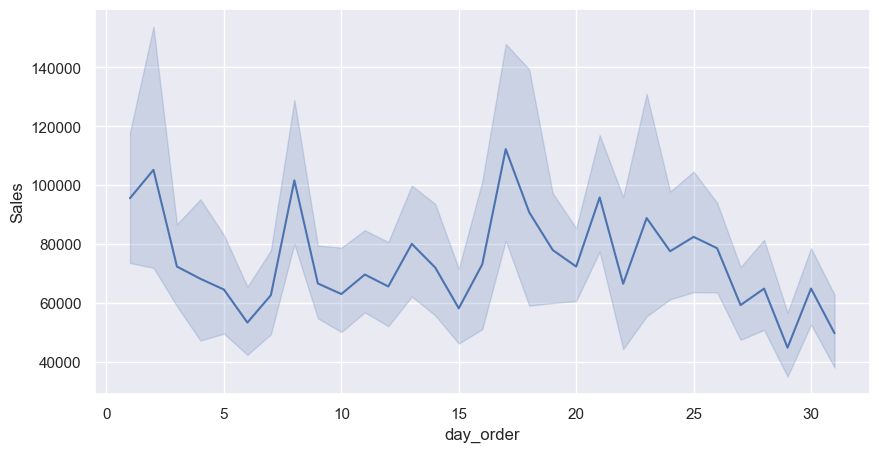

In [148]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='day_order' , y='Sales' , data=df , estimator=sum )

In [539]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


At Which month in all years he make nagative Profit ?

In [570]:
# In this series we notice he loss profit in Jan 2015 and in Jul 2014
df.groupby(['year' ,'month' ])['Profit'].sum()

year  month
2014  1         2450.1907
      2          862.3084
      3          498.7299
      4         3488.8352
      5         2738.7096
      6         4976.5244
      7         -841.4826
      8         5318.1050
      9         8328.0994
      10        3448.2573
      11        9292.1269
      12        8983.5699
2015  1        -3281.0070
      2         2813.8508
      3         9732.0978
      4         4187.4962
      5         4667.8690
      6         3335.5572
      7         3288.6483
      8         5355.8084
      9         8209.1627
      10        2817.3660
      11       12474.7884
      12        8016.9659
2016  1         2824.8233
      2         5004.5795
      3         3611.9680
      4         2977.8149
      5         8662.1464
      6         4750.3781
      7         4432.8779
      8         2062.0693
      9         9328.6576
      10       16243.1425
      11        4011.4075
      12       17885.3093
2017  1         7140.4391
      2         1613.8720


DataFrame that shwos the loss in profit in Jan 2015 and in Jul 2014

In [576]:
df_loss=df[((df['year']==2014) & (df['month']==7)) | ((df['year']==2015) & (df['month']==1))  ] 
df_loss.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
92,2015-01-31,2015-02-05,Second Class,Karl Braun,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Paper,Xerox 1999,12.96,2,0.0,6.2208,19.6992,2015,5,1,31
93,2015-01-31,2015-02-05,Second Class,Karl Braun,Consumer,Minneapolis,Minnesota,Central,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",53.34,3,0.0,16.5354,143.4846,2015,5,1,31
94,2015-01-31,2015-02-05,Second Class,Karl Braun,Consumer,Minneapolis,Minnesota,Central,Office Supplies,Binders,Ibico Standard Transparent Covers,32.96,2,0.0,16.1504,49.7696,2015,5,1,31
212,2015-01-02,2015-01-09,Standard Class,Victoria Wilson,Corporate,Medina,Ohio,East,Office Supplies,Labels,Avery 505,23.68,2,0.2,8.8800,29.0080,2015,7,1,2
213,2015-01-02,2015-01-09,Standard Class,Victoria Wilson,Corporate,Medina,Ohio,East,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,452.45,5,0.5,-244.3230,1375.4480,2015,7,1,2


Graph shows The Sub-Category he loss in 

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

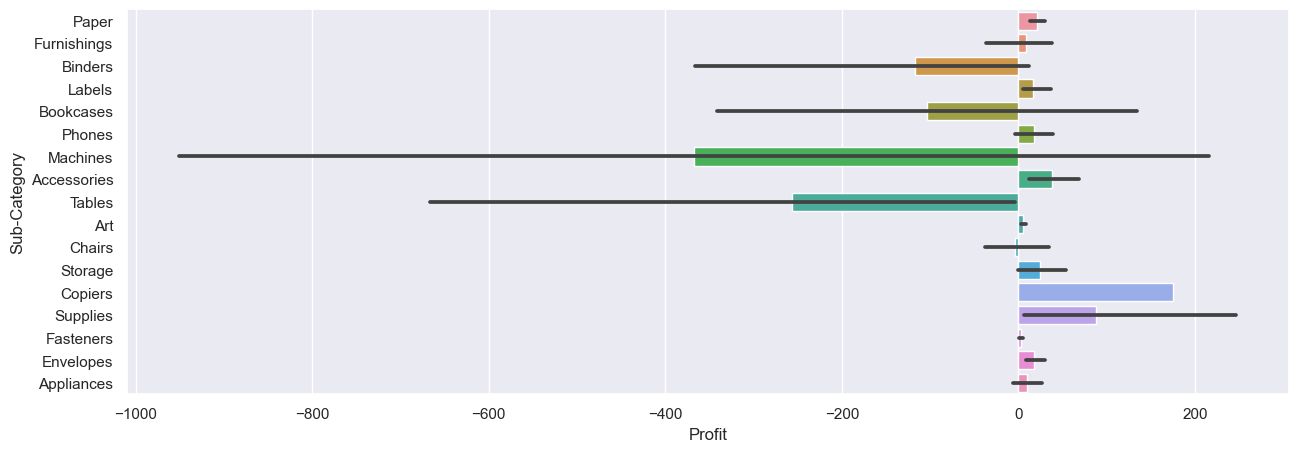

In [580]:
sns.barplot(x='Profit' , y='Sub-Category' , data=df_loss)

From the graph he should focus on Machines and Tables and Binders and Bookcases in Jan and Jul

## City section  
1- The Top 10 Cities sales and profit  
2- The bottom 10 Cities that have less Profit and Sales  
3- The best Cities that has orders

In [581]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


Table shows the top 10 Cities with Sales and Quantity

In [140]:
df_topc=pd.DataFrame(df.groupby(['City'])['Quantity' , 'Sales'].sum().sort_values('Sales' , ascending=False)[:10])
df_topc

/var/folders/rs/1v5sl0qn0zq960jj0_wjb06w0000gn/T/ipykernel_30538/368925471.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_topc=pd.DataFrame(df.groupby(['City'])['Quantity' , 'Sales'].sum().sort_values('Sales' , ascending=False)[:10])


,Quantity,Sales
City,,
New York City,3417,256368.1610
Los Angeles,2879,175851.3410
Seattle,1590,119540.7420
San Francisco,1935,112669.0920
Philadelphia,1981,109077.0130
Houston,1466,64504.7604
Chicago,1132,48539.5410
San Diego,670,47521.0290
Jacksonville,429,44713.1830


Barplot shows the top 10 cities with sales

<AxesSubplot:xlabel='City', ylabel='Sales'>

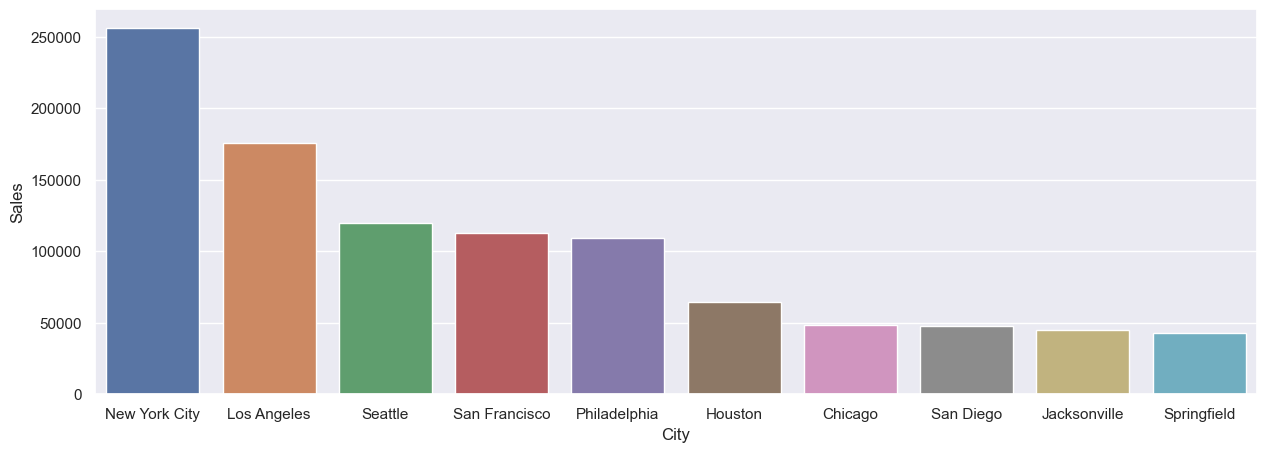

In [142]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=df_topc.index , y='Sales' , estimator=sum , data=df_topc)

Here we convert The month column to name of the month

In [589]:
df_new['month']=df_new['Order Date'].dt.month_name()
df_new.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
7980,2014-01-03,2014-01-07,Standard Class,Darren Powers,Consumer,Houston,Texas,Central,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,20.7656,2014,4,January,3
739,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,24.0099,2014,4,January,4
740,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,719.3412,2014,4,January,4
741,2014-01-04,2014-01-08,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,6.9030,2014,4,January,4
1759,2014-01-05,2014-01-12,Standard Class,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,42.0024,2014,7,January,5


Table shows the bottom 10 Cities with Sales and Quantity With Barplot

In [203]:
df_bottomc=pd.DataFrame(df.groupby(['City'])['Quantity' , 'Sales'].sum().sort_values('Sales' , ascending=True)[:10])
df_bottomc

/var/folders/rs/1v5sl0qn0zq960jj0_wjb06w0000gn/T/ipykernel_30961/4246588877.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bottomc=pd.DataFrame(df.groupby(['City'])['Quantity' , 'Sales'].sum().sort_values('Sales' , ascending=True)[:10])


,Quantity,Sales
City,,
Abilene,2,1.392
Elyria,1,1.824
Jupiter,1,2.064
Pensacola,3,2.214
Ormond Beach,3,2.808
San Luis Obispo,2,3.620
Springdale,2,4.300
Layton,4,4.960
Keller,2,6.000


Barplot shows the bottom 10 Cities with sales

<AxesSubplot:xlabel='City', ylabel='Sales'>

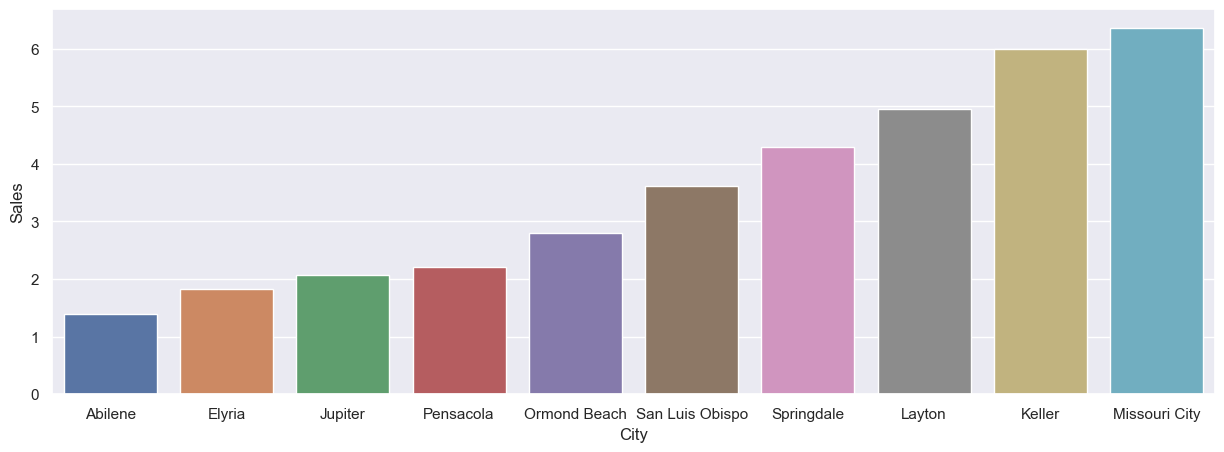

In [144]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=df_bottomc.index , y='Sales' , estimator=sum , data=df_bottomc)

What is the top10 States that have much oreders ?

<AxesSubplot:>

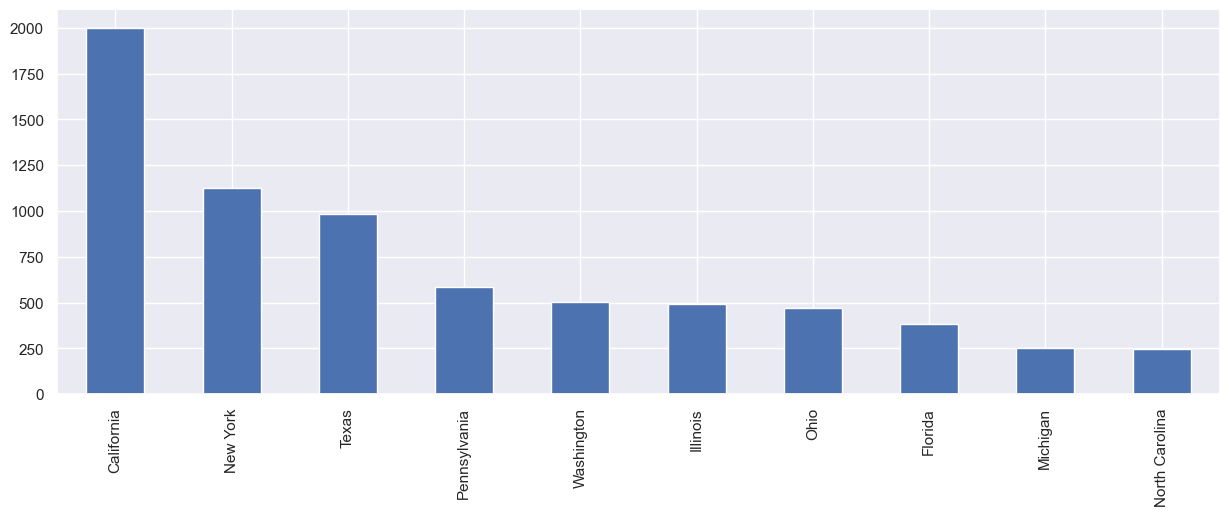

In [608]:
# barplot shows best cities that has orders
df['State'].value_counts()[:10].plot(kind='bar') 

Table shows Top 10 Cities that have best Profit

In [60]:
df_best_cities=pd.DataFrame(df.groupby(['City'])['Profit'].sum().sort_values(ascending=False)[0:10])
df_best_cities

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


Barplot shows the top10 Cities with there Profits.

<AxesSubplot:xlabel='City', ylabel='Profit'>

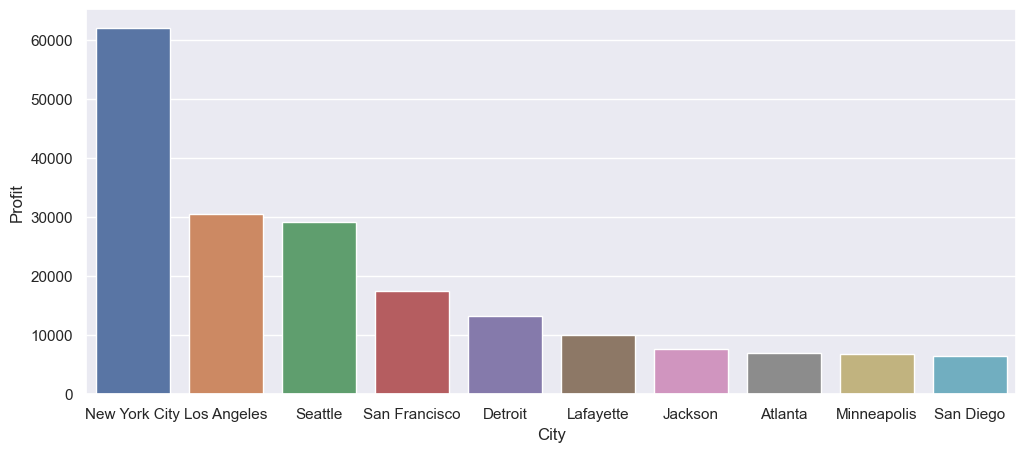

In [61]:
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=df_best_cities , x=df_best_cities.index ,y=df_best_cities.Profit)

## Customers Section  
1- Customers that make many orders  
2- Define The new Customer for each year   
3- Make a data frame that contains customers with year of his first order

In [609]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


Data Frame shows every Customer and how many orders he order

In [151]:
df_customer_name_orders_count=pd.DataFrame(df['Customer Name'].value_counts().reset_index())
df_customer_name_orders_count 

,index,Customer Name
0,William Brown,37
1,John Lee,34
2,Matt Abelman,34
3,Paul Prost,34
4,Chloris Kastensmidt,32
...,...,...
788,Lela Donovan,1
789,Anthony O'Donnell,1
790,Carl Jackson,1
791,Ricardo Emerson,1


In [152]:
# Table that shows every Customer with the order Counts
df_customer_name_orders_count.rename( columns={"index": "Customer Name", "Customer Name": "Order Count"},inplace=True,)
df_customer_name_orders_count

,Customer Name,Order Count
0,William Brown,37
1,John Lee,34
2,Matt Abelman,34
3,Paul Prost,34
4,Chloris Kastensmidt,32
...,...,...
788,Lela Donovan,1
789,Anthony O'Donnell,1
790,Carl Jackson,1
791,Ricardo Emerson,1


The Customers that make more than 1 order

In [153]:
df_customer_name_orders_count[df_customer_name_orders_count['Order Count']>1 ]

,Customer Name,Order Count
0,William Brown,37
1,John Lee,34
2,Matt Abelman,34
3,Paul Prost,34
4,Chloris Kastensmidt,32
...,...,...
783,Thais Sissman,2
784,Bobby Odegard,2
785,Nicole Brennan,2
786,Phillip Breyer,2


Here we will calculate the new Customers every year

In [154]:
#This is the list of Customers in 2014
Customers_2014=list(df[df['year']==2014]['Customer Name'].unique())
Customers_2014 

['Brosina Hoffman',
 'Pete Kriz',
 'Alejandro Grove',
 'Zuschuss Donatelli',
 "Patrick O'Donnell",
 'Brendan Sweed',
 'Joel Eaton',
 'Duane Noonan',
 'Ryan Crowe',
 'Alan Dominguez',
 'Philip Fox',
 'Maureen Gastineau',
 'Dave Brooks',
 'Becky Martin',
 'Chad Sievert',
 'Jennifer Braxton',
 'David Kendrick',
 'Robert Marley',
 'Frank Merwin',
 'Cassandra Brandow',
 'Bruce Stewart',
 'Erin Ashbrook',
 'Dianna Wilson',
 'Sean Braxton',
 'Kelly Lampkin',
 'Ken Brennan',
 'Corey Roper',
 'Thomas Seio',
 'Andy Gerbode',
 'Sung Pak',
 'Nathan Mautz',
 'Frank Atkinson',
 'Alyssa Crouse',
 'Jonathan Doherty',
 'Julia Dunbar',
 'Arthur Gainer',
 'Nathan Gelder',
 'Jack Garza',
 'Bart Pistole',
 'Luke Foster',
 'Stephanie Phelps',
 'Shirley Daniels',
 'Mike Kennedy',
 'Sanjit Chand',
 'Jeremy Pistek',
 'Xylona Preis',
 'Erin Mull',
 'Sue Ann Reed',
 'Carl Weiss',
 'Astrea Jones',
 'Bradley Drucker',
 'Paul Gonzalez',
 'Ashley Jarboe',
 'Cynthia Arntzen',
 'Melanie Seite',
 'Lena Radford',
 'Alan

In [155]:
#This is the list of Customers in 2015
Customers_2015=list(df[df['year']==2015]['Customer Name'].unique())
Customers_2015

["Sean O'Donnell",
 'Harold Pawlan',
 'Emily Burns',
 'Tracy Blumstein',
 'Steve Nguyen',
 'Darren Powers',
 'Kunst Miller',
 'Paul Stevenson',
 'Joel Eaton',
 'Julie Creighton',
 'Karl Braun',
 'Lena Cacioppo',
 'Pete Armstrong',
 'Dave Kipp',
 'Greg Guthrie',
 'Helen Andreada',
 'Stephanie Phelps',
 'Neil Knudson',
 'Eric Murdock',
 'Jim Kriz',
 'Mark Packer',
 'Mary Zewe',
 'Michael Stewart',
 'Victoria Wilson',
 'Joni Blumstein',
 'David Smith',
 'Valerie Dominguez',
 'Dan Reichenbach',
 'Alan Hwang',
 'Steven Cartwright',
 "Jas O'Carroll",
 'Alan Schoenberger',
 'Doug Bickford',
 'Ken Lonsdale',
 'Chad Sievert',
 'Russell Applegate',
 'Laura Armstrong',
 'Denny Ordway',
 'Dean Katz',
 'Joseph Holt',
 'Joni Sundaresam',
 'Maya Herman',
 'Maribeth Dona',
 'Christopher Martinez',
 'Dean Braden',
 'Brian Dahlen',
 'Mike Gockenbach',
 'Karen Bern',
 'Darren Koutras',
 'Liz MacKendrick',
 'Jeremy Farry',
 'Trudy Glocke',
 'Charles Crestani',
 'Bruce Degenhardt',
 'Sylvia Foulston',
 'De

We store 2014 and 2015 Customers in a List Then the diffrence between them is the new Customers in 2015 

In [156]:
# Now we want to know the new Customers in 2015 
diffrence1=list(set(Customers_2015)-set(Customers_2014 ))
diffrence1

['Julia West',
 'Jeremy Ellison',
 'Kalyca Meade',
 'Emily Grady',
 'Brad Thomas',
 'Robert Dilbeck',
 'Dan Reichenbach',
 'Becky Pak',
 'Anna Gayman',
 'Shaun Chance',
 'Denny Blanton',
 'Ralph Kennedy',
 'Dave Kipp',
 'Ritsa Hightower',
 'Bryan Spruell',
 'Max Jones',
 'Claire Gute',
 "Doug O'Connell",
 'Justin Hirsh',
 "Rose O'Brian",
 'Sandra Glassco',
 'Linda Southworth',
 'Shaun Weien',
 'Eric Murdock',
 'Greg Hansen',
 'Katrina Bavinger',
 'Bill Donatelli',
 'Guy Thornton',
 'Jennifer Jackson',
 'Bobby Odegard',
 'Karen Seio',
 'Rob Haberlin',
 'Philisse Overcash',
 'Christy Brittain',
 'Edward Becker',
 'Jesus Ocampo',
 'Dean Braden',
 'Ben Peterman',
 'Fred Harton',
 'Yana Sorensen',
 'Peter McVee',
 'Michael Paige',
 'Tim Taslimi',
 'Thais Sissman',
 'Sarah Jordon',
 'Fred Wasserman',
 'Theone Pippenger',
 'Andrew Gjertsen',
 'Charlotte Melton',
 'Juliana Krohn',
 'Trudy Schmidt',
 'Toby Gnade',
 'Ann Chong',
 'Alan Haines',
 'Tonja Turnell',
 'Evan Minnotte',
 'Henry MacAlli

For loop to check if the new customers in 2015 was in 2014 or not 

In [157]:
for i in diffrence1 : 
    if i in Customers_2014 :
        print('iam here')
    else:
        continue

We will do the same steps in 2016 and 2017 to define the new Customers in 2016 and 2015

In [158]:
# The list of customers of 2016 and 2017
Customers_2016=list(df[df['year']==2016]['Customer Name'].unique())
Customers_2017=list(df[df['year']==2017]['Customer Name'].unique())

In [159]:
# Now we want the new Customers in 2016
results=set(Customers_2014).union(set(Customers_2015))
diffrence2=list(set(Customers_2016)-results)
diffrence2 # The new customers in 2016

['Mick Hernandez',
 'Bill Eplett',
 'Sean Wendt',
 'Anemone Ratner',
 'Rob Beeghly',
 'Neola Schneider',
 'Jim Sink',
 'Sally Knutson',
 'Alex Grayson',
 'Justin Ellison',
 'Max Ludwig',
 'Carol Darley',
 'Don Weiss',
 'Harold Engle',
 'Ted Butterfield',
 'Adrian Shami',
 'Caroline Jumper',
 'Larry Blacks',
 'Carl Jackson',
 'Alejandro Savely',
 'Chris McAfee',
 'Jill Matthias',
 'Phillip Flathmann',
 'Bryan Davis',
 'Henia Zydlo',
 'Susan MacKendrick',
 'Bobby Elias',
 'Erica Bern',
 'Ralph Ritter',
 'Bill Overfelt',
 'Lela Donovan',
 'Ed Ludwig',
 'Liz Preis',
 'Sung Chung',
 'Lindsay Williams',
 'Scot Coram',
 'Janet Martin',
 'Joy Bell-',
 'Cynthia Voltz',
 'Robert Waldorf',
 'Darrin Van Huff',
 'Raymond Buch',
 'Roy Skaria',
 'Charles McCrossin',
 'Jason Gross',
 'Clay Rozendal',
 'Craig Leslie',
 'Christopher Conant',
 'Todd Boyes',
 'Susan Vittorini',
 "Anthony O'Donnell"]

In [160]:
# The new Customers in 2017
results1=results.union(set(Customers_2016)) 
diffrence3=list(set(Customers_2017)-results1)
diffrence3

['Chuck Sachs',
 'Mitch Gastineau',
 'Patricia Hirasaki',
 'Theresa Coyne',
 'Michelle Lonsdale',
 'Clay Cheatham',
 'Jocasta Rupert',
 'Tony Molinari',
 'Christina DeMoss',
 'Roland Murray',
 'Jenna Caffey']

In [161]:
for i in diffrence3 : # For loop to chech if the new Customers in 2017 are in 2014 or 2015 or 2016
    if i in Customers_2014 or i in Customers_2015 or i in Customers_2016 :
        print('iam here')
    else:
        continue

Here i check if the all new Customer was equal to all Customers of the orignal data

In [162]:
len(diffrence1+diffrence2+diffrence3+Customers_2014) , len(df['Customer Name'].unique()) # Check the new customers for all year VS The orignal data .

(793, 793)

In [163]:
len(Customers_2014) , len(diffrence1) ,len(diffrence2) , len(diffrence3) # We find that the new customers decrease every year

(595, 136, 51, 11)

Here i want to make a Data Frame contains every customers and the year that he order his first order 

first, make a lists for all years based on the length of the customers of the years

In [194]:
list2014=[]
for i in range(len(Customers_2014)):
    list2014.append(2014)
    
list2015=[]
for i in range(len(diffrence1)):
    list2015.append(2015)
    
list2016=[]
for i in range(len(diffrence2)):
    list2016.append(2016)   
    
list2017=[]
for i in range(len(diffrence3)):
    list2017.append(2017)    

Here is example to make a data frame of year 2015 and use zip function to concatnate the 2 list together

In [198]:
df_new_customers_years = pd.DataFrame(list(zip(diffrence1, list2015)), columns =['Name', 'year'])
df_new_customers_years

,Name,year
0,Julia West,2015
1,Jeremy Ellison,2015
2,Kalyca Meade,2015
3,Emily Grady,2015
4,Brad Thomas,2015
...,...,...
131,Giulietta Baptist,2015
132,Victoria Brennan,2015
133,Brenda Bowman,2015
134,Dana Kaydos,2015


Now lets do the same steps for all years .  
make a for loop that contain 2 variables to make concatanate every 2 lists together to make a data frame , then this data frame will append it to a list

In [199]:
list_of_new_customers=[] # empty list (that list will contain an elements of data frams)
for i,j in [(Customers_2014, list2014), (diffrence1,list2015),(diffrence2,list2016),(diffrence3,list2017)]: # for loop have 2 variables every variable had a list
    df_new_customers_years = pd.DataFrame(list(zip(i, j)), columns =['Name', 'year']) # here concatnate the 2 lists (i,j) and convert it in a data frame
    list_of_new_customers.append(df_new_customers_years) # appened the data frame in the empty list

Now we have a list of data frames , let's concatnate it !

In [200]:
list_of_new_customers 

[                   Name  year
 0       Brosina Hoffman  2014
 1             Pete Kriz  2014
 2       Alejandro Grove  2014
 3    Zuschuss Donatelli  2014
 4     Patrick O'Donnell  2014
 ..                  ...   ...
 590     George Ashbrook  2014
 591    Richard Eichhorn  2014
 592            Roy Phan  2014
 593        Jamie Kunitz  2014
 594       Nicole Hansen  2014
 
 [595 rows x 2 columns],
                   Name  year
 0           Julia West  2015
 1       Jeremy Ellison  2015
 2         Kalyca Meade  2015
 3          Emily Grady  2015
 4          Brad Thomas  2015
 ..                 ...   ...
 131  Giulietta Baptist  2015
 132   Victoria Brennan  2015
 133      Brenda Bowman  2015
 134        Dana Kaydos  2015
 135     Joni Wasserman  2015
 
 [136 rows x 2 columns],
                   Name  year
 0       Mick Hernandez  2016
 1          Bill Eplett  2016
 2           Sean Wendt  2016
 3       Anemone Ratner  2016
 4          Rob Beeghly  2016
 5      Neola Schneider  2016
 6  

Concatnate a list of data frame and display our final data frame !

In [201]:
df_customer_names_years = pd.concat(list_of_new_customers)
df_customer_names_years

,Name,year
0,Brosina Hoffman,2014
1,Pete Kriz,2014
2,Alejandro Grove,2014
3,Zuschuss Donatelli,2014
4,Patrick O'Donnell,2014
...,...,...
6,Jocasta Rupert,2017
7,Tony Molinari,2017
8,Christina DeMoss,2017
9,Roland Murray,2017


We notice here its have 793 record which is the same count of records above.

Barplot shows every year by the new customers count  

<AxesSubplot:xlabel='year', ylabel='count'>

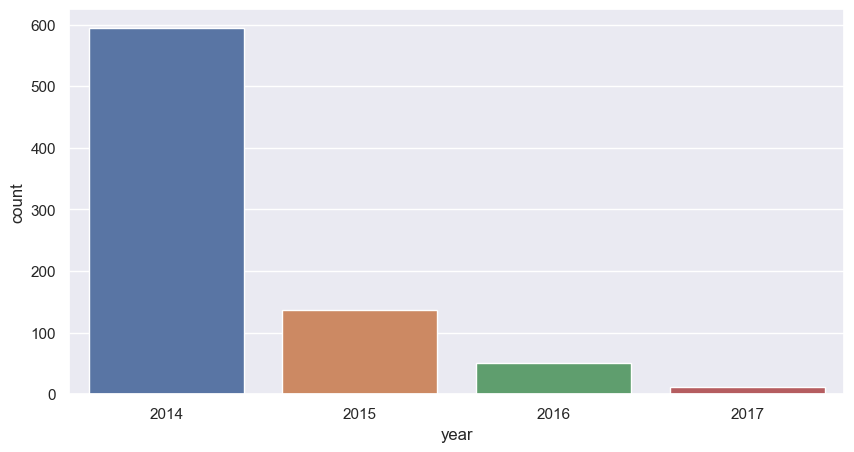

In [202]:
sns.countplot(x='year' , data=df_customer_names_years)

## Conclusion :     
We notice that the customers  decrease every year despite making more Profit every year   
## Recomindation :   
this shows his proficiency since customers place another order after their first, which increases profit.  but he's not good at attracting new Customers, so working on improving advertising helps attract customers, who will make another order in the future

## Discounts  
1- Correlation between discounts and quantities  
2- If the discounts make more Profit or Sales ?

In [672]:
df_new['Discount'].unique()

array([0.2 , 0.8 , 0.  , 0.6 , 0.7 , 0.15, 0.5 , 0.4 , 0.1 , 0.3 , 0.32,
       0.45])

What is the best quantity ordered by Discounts ?

<AxesSubplot:xlabel='Discount', ylabel='Quantity'>

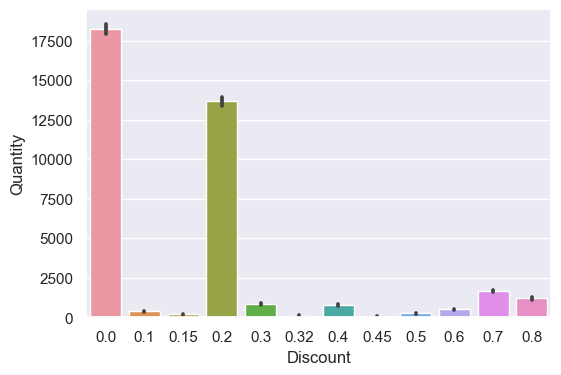

In [116]:
sns.barplot(x='Discount' , y='Quantity' , data=df , estimator=sum )

<AxesSubplot:xlabel='Discount', ylabel='Quantity'>

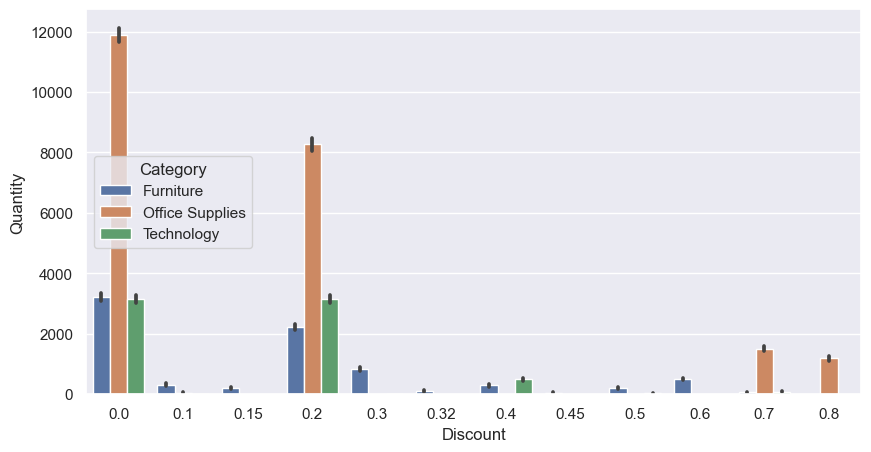

In [97]:
# At which category ?
sns.barplot(x='Discount' , y='Quantity' , data=df , estimator=sum , hue='Category' )

How much the discounts sales and how much the Profit makes ?

<AxesSubplot:xlabel='Discount'>

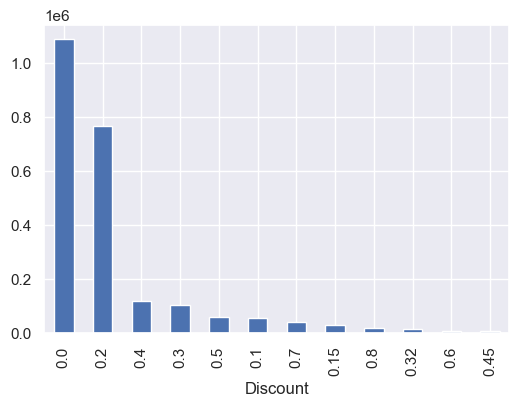

In [121]:
df.groupby(['Discount'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar') #Sales he make during Discounts

<AxesSubplot:xlabel='Discount'>

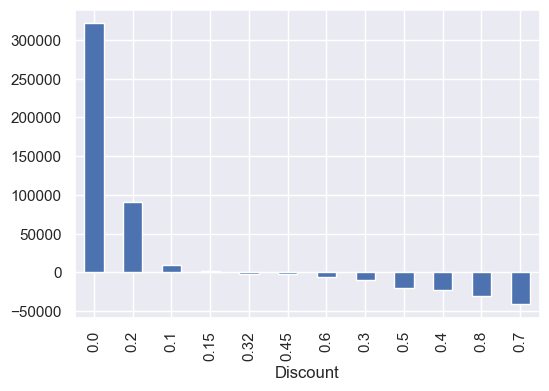

In [120]:
df.groupby(['Discount'])['Profit'].sum().sort_values(ascending=False).plot(kind='bar') # Profit he makes during the Discounts

Profit of Discount in Categories

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

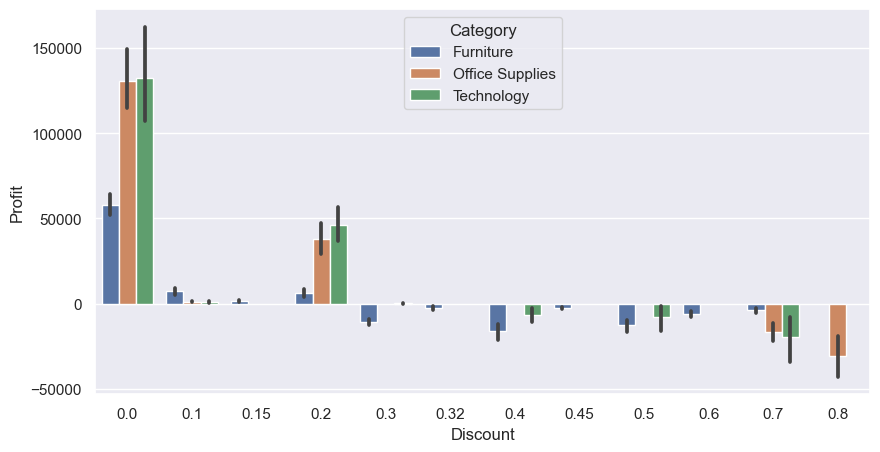

In [278]:
sns.barplot(data=df,x='Discount' , y='Profit' , estimator=sum , hue='Category')

# Feature Transformations     
1- Drop Unnecessary Columns  
2- Deal With Categorical data by on-Hot Encoder

Make New Data Frame For Training 

In [72]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sell_Price,year,time_shipping_spent,month,day_order
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,482.006400,2016,3,11,8
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1976.238000,2016,3,11,8
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,22.368600,2016,4,6,12
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3016.369125,2015,7,10,11
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,33.272400,2015,7,10,11


Here we Drop Unnecessary Columns

In [22]:
df_train_test=df.drop(['Product Name' ,'Category' ,'year' , 'Sell_Price' ,'Sales' ,'Customer Name','Order Date' ,'Ship Date' ] , axis=1)
df_train_test

,Ship Mode,Segment,City,State,Region,Sub-Category,Quantity,Discount,Profit,time_shipping_spent,month,day_order
0,Second Class,Consumer,Henderson,Kentucky,South,Bookcases,2,0.00,41.9136,3,11,8
1,Second Class,Consumer,Henderson,Kentucky,South,Chairs,3,0.00,219.5820,3,11,8
2,Second Class,Corporate,Los Angeles,California,West,Labels,2,0.00,6.8714,4,6,12
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Tables,5,0.45,-383.0310,7,10,11
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Storage,2,0.20,2.5164,7,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furnishings,3,0.20,4.1028,2,1,21
9990,Standard Class,Consumer,Costa Mesa,California,West,Furnishings,2,0.00,15.6332,5,2,26
9991,Standard Class,Consumer,Costa Mesa,California,West,Phones,2,0.20,19.3932,5,2,26
9992,Standard Class,Consumer,Costa Mesa,California,West,Paper,4,0.00,13.3200,5,2,26


Now we will Work with Categorical Nominal data by ONE-Hot Encoder

In [23]:
df_train_test=pd.get_dummies(df_train_test , columns=['Ship Mode' , 'Segment' ,'City' , 'Sub-Category' ,'Quantity' ,'Discount' ,'time_shipping_spent' ,'month' ,'day_order','State' , 'Region'], drop_first=True)


In [24]:
df_train_test.head()

,Profit,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,...,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Region_East,Region_South,Region_West
0,41.9136,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,219.5820,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,6.8714,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-383.0310,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.5164,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Our target was Profit column , and here we will split data

In [26]:
x=df_train_test.drop('Profit' , axis=1) # The features
y=df_train_test['Profit'] # The target
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2) 

## Recomendations.
1- Concentrate on the Technology subcategory, phones, and chairs because they sell the most and are the most profitable. Combine them with things that are less profitable, such bookcases, tables, and chairs, to balance the losses.
  
2- Focus on time for making an order in the technology category cause when the time was too much it causes losses, and make an option to make a shipe mode is same day or second class or standard 
  
3- Make packages for home office customers cause these customers are busy at work and maybe they don’t have much time for choosing or making an order.   
  
4- Combine the chairs which are the most selling with tables which is the least selling and sell it as discounted bundle.    
  
5- Provide coupons for regular consumers to increase orders placed. 
  
6- Focus on increasing advertisements in cities with low order counts to increase visibility.    
  
7- Our weak points lie in attracting new customers but once a new customer is gained, he becomes a regular one. Thus, efforts on attracting new customers should be implemented 





